# Analysis for report

In this notebook we generate all the figures that are used in the final report. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import utils

In [2]:
from tueplots import bundles
plt.rcParams.update(bundles.neurips2021())
figheight = bundles.neurips2021()["figure.figsize"][1]
figwidth = bundles.neurips2021()["figure.figsize"][0]
print(figheight, figwidth)

1.699593426303529 5.499999861629998


# Size matters

Test difference in performance on results of all 4 datasets.
- We use only the non-switched results
- We compare for all subtasks, e.g. cause and effect and first, second and third color/nonsense word

In [3]:
def compare_model_sizes_across_tasks_zero_shot(save_file="figures/sizes_zero_shot.pdf"):
    
    results_3c_zs, lengths_3c_zs = utils.compare_model_sizes_colors("data/toy_problem_3_colors_results/toy_problem_3c_zero_shot_results_{}.csv")
    results_3n_zs, lengths_3n_zs = utils.compare_model_sizes_nonsense_words("data/toy_problem_3_nonsense_words_results/toy_problem_3n_zero_shot_results_{}.csv")
    results_2s_zs, lengths_2s_zs = utils.compare_model_sizes_ce_2_sentences("data/bigbench_results/ce_two_sentences_zero_shot_results_{}.csv")
    results_1s_zs, lengths_1s_zs = utils.compare_model_sizes_ce_1_sentence("data/bigbench_results/ce_one_sentence_zero_shot_results_{}.csv")
      
    tick_labels_3c = ["first ball", "second ball", "final ball"]
    tick_labels_3n = ["first word", "second word", "final word"]
    tick_labels_2s = ["cause", "effect"]
    tick_labels_1s = ["correct sentence"]
    labels = ["ada", "babbage", "curie", "davinci"]
    colors = ["aqua", "lightskyblue", "violet", "darkviolet"]
    x3 = np.arange(3)
    x2 = np.arange(2)
    x1 = np.arange(1)
    w = 0.18
    c = 0.2
    
    fig, ax = plt.subplots(4, 1, figsize=(figwidth, 4*figheight), dpi=300)
    
    ### 3 colors
    for j, result in enumerate(results_3c_zs):
        perc = result / lengths_3c_zs[j]
        ax[0].bar(x3 + (-1.5 + j) * c, perc[:,1], width=w, label=labels[j], color=colors[j])
    
    ax[0].set_xticks(x3)
    ax[0].axhline(1/3, linestyle='--', color='black', label="random")
    ax[0].set_xticklabels(tick_labels_3c)
    ax[0].grid()
    ax[0].set_ylim(0,1.05)
    ax[0].legend()
    ax[0].set_title("three colored balls")
    
    ### 3 nonsense words
    for j, result in enumerate(results_3n_zs):
        perc = result / lengths_3n_zs[j]
        ax[1].bar(x3 + (-1.5 + j) * c, perc[:,1], width=w, label=labels[j], color=colors[j])
    
    ax[1].set_xticks(x3)
    ax[1].axhline(1/3, linestyle='--', color='black', label="random")
    ax[1].set_xticklabels(tick_labels_3n)
    ax[1].grid()
    ax[1].set_ylim(0,1.05)
    #ax[1].legend()
    ax[1].set_title("three nonsense words")
    
    ### 2 sentences
    for j, result in enumerate(results_2s_zs):
        perc = result / lengths_2s_zs[j]
        ax[2].bar(x2 + (-1.5 + j) * c, perc[:,1], width=w, label=labels[j], color=colors[j])
    
    ax[2].set_xticks(x2)
    ax[2].axhline(1/2, linestyle='--', color='black', label="random")
    ax[2].set_xticklabels(tick_labels_2s)
    ax[2].grid()
    ax[2].set_ylim(0,1.05)
    ax[2].set_title("two sentences - cause and effect")
    #ax[2].legend()
    
    
    ### 1 sentence
    for j, result in enumerate(results_1s_zs):
        perc = result / lengths_1s_zs[j]
        ax[3].bar(x1 + (-1.5 + j) * c, perc[:,1], width=w, label=labels[j], color=colors[j])
    
    ax[3].set_xticks(x1)
    ax[3].axhline(1/2, linestyle='--', color='black', label="random")
    ax[3].set_xticklabels(tick_labels_1s)
    ax[3].grid()
    ax[3].set_ylim(0,1.05)
    #ax[3].legend()
    ax[3].set_title("one sentence - cause and effect")
    
    plt.savefig(save_file)
    plt.show();

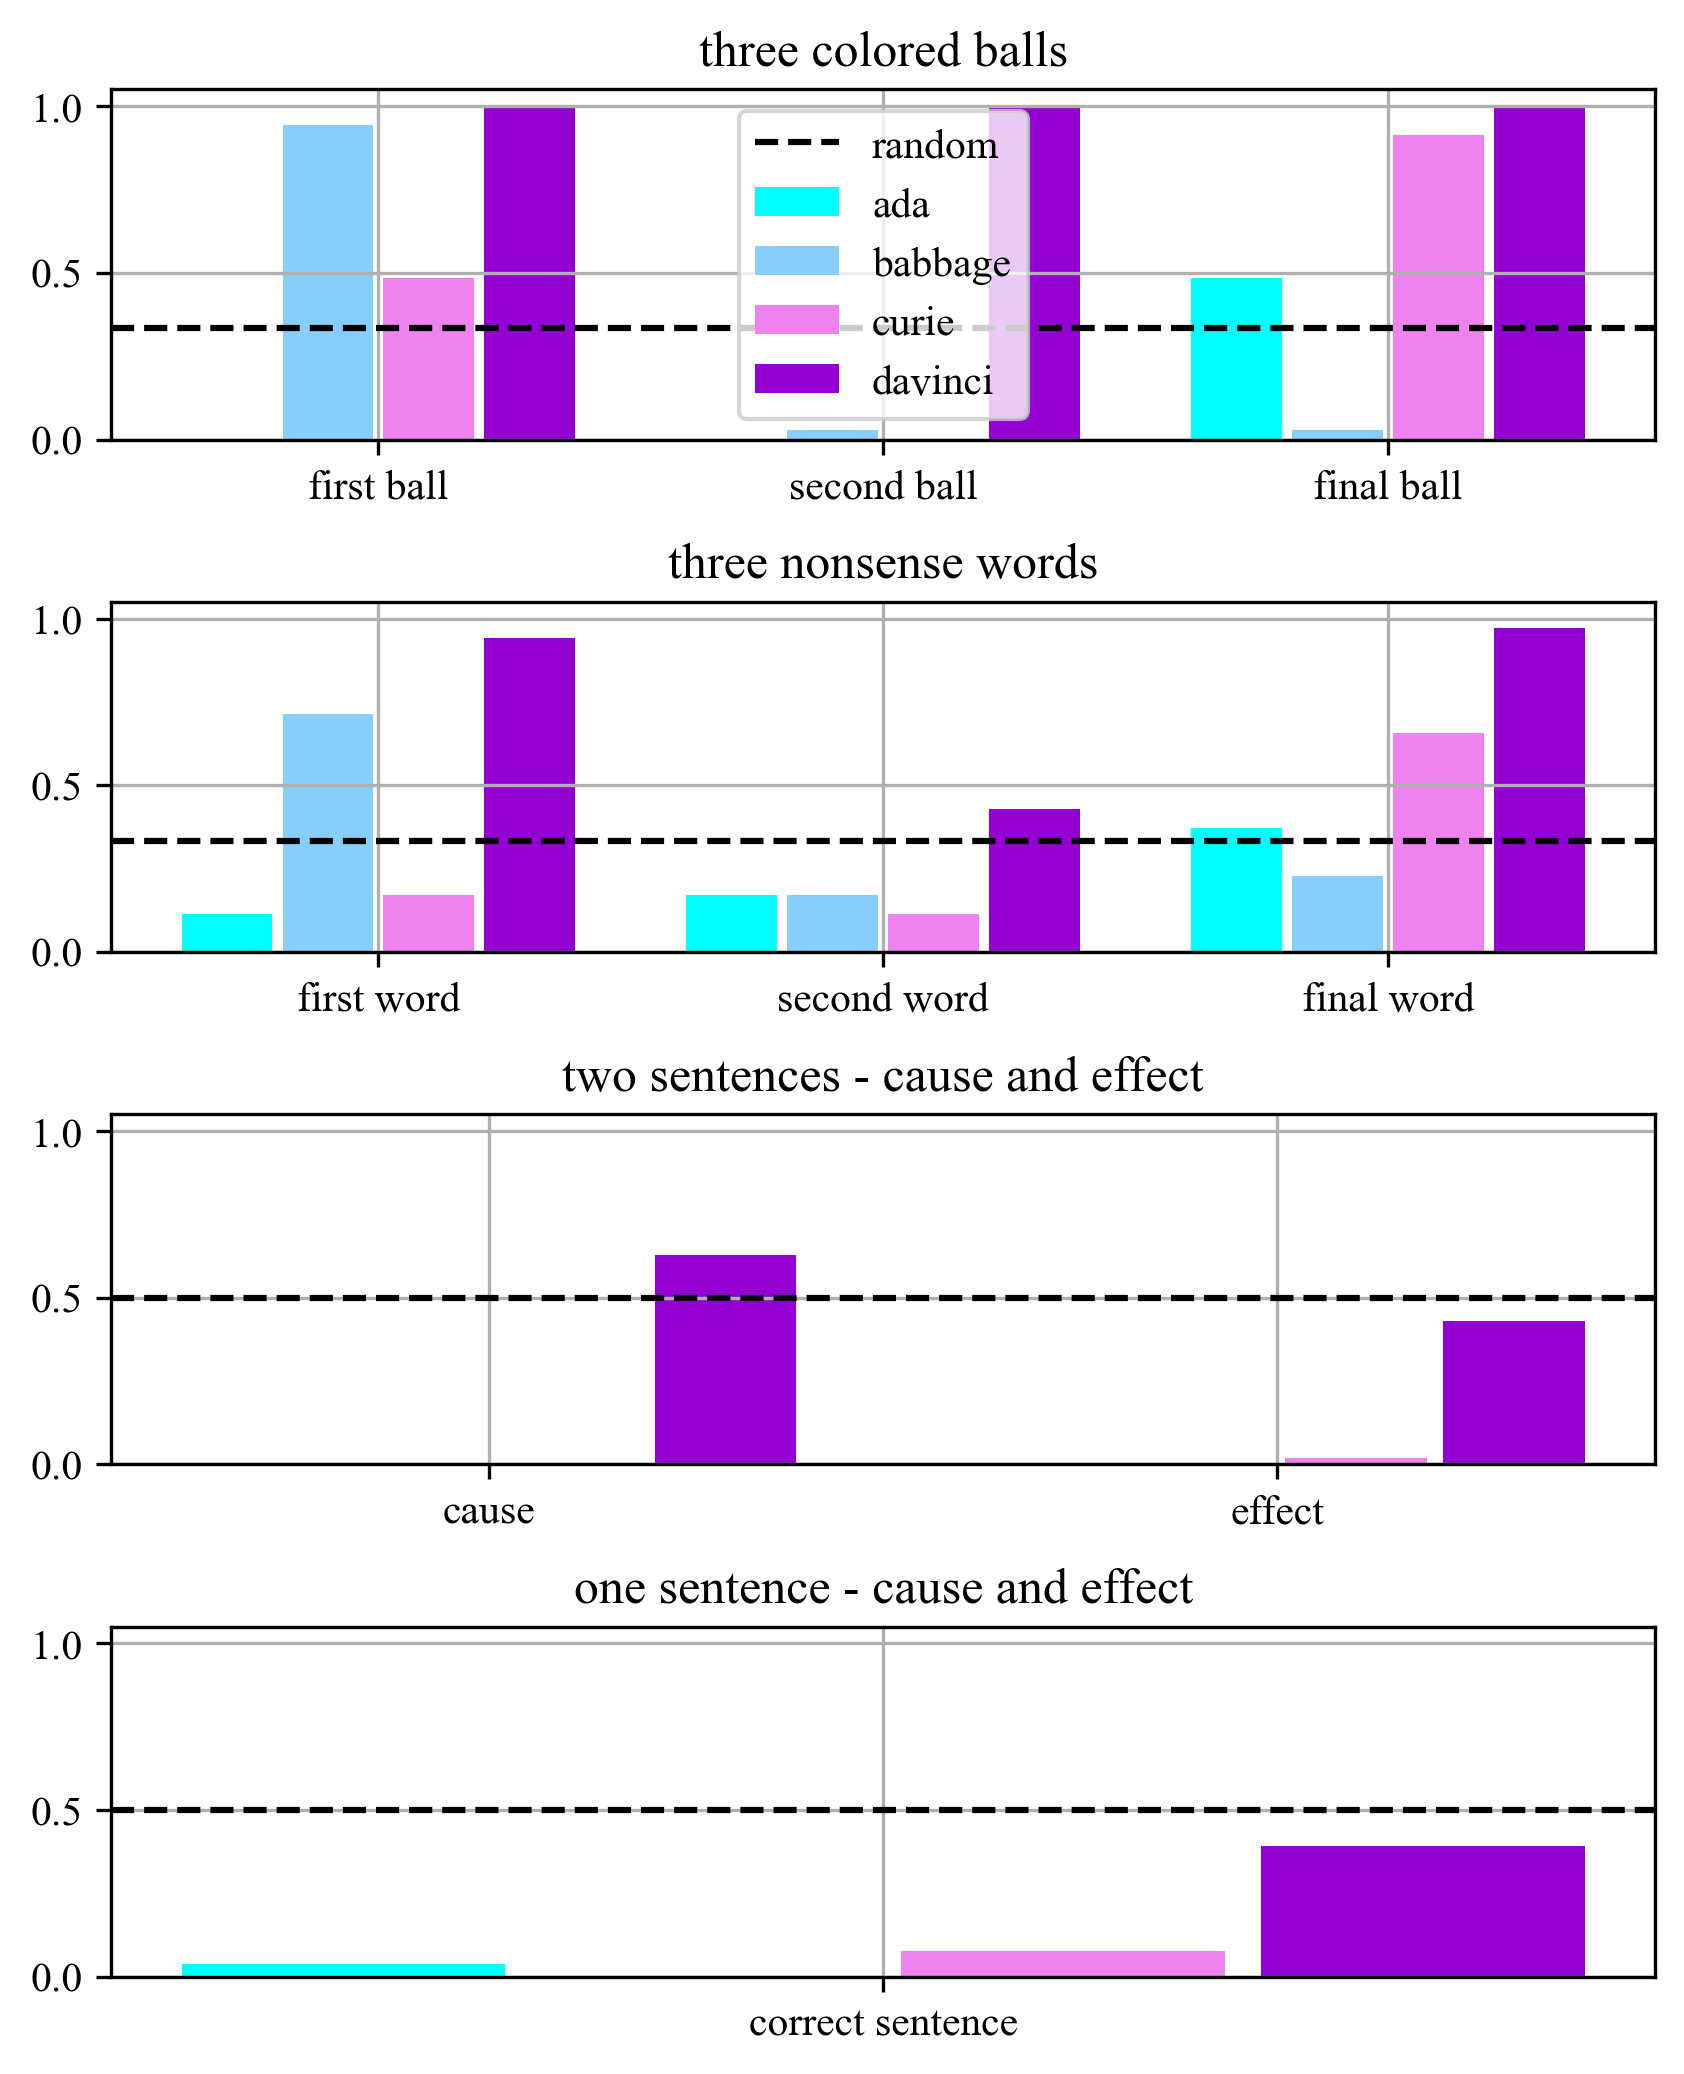

In [4]:
compare_model_sizes_across_tasks_zero_shot(save_file="figures/sizes_zero_shot.pdf")

# Shots matter

similar analysis as above but with adding one and k-shot performance

In [5]:
def compare_model_sizes_across_tasks_zero_one_k_shot(save_file="figures/sizes_zero_one_k_shot.pdf"):
    
    results_3c_zs, lengths_3c_zs = utils.compare_model_sizes_colors("data/toy_problem_3_colors_results/toy_problem_3c_zero_shot_results_{}.csv")
    results_3n_zs, lengths_3n_zs = utils.compare_model_sizes_nonsense_words("data/toy_problem_3_nonsense_words_results/toy_problem_3n_zero_shot_results_{}.csv")
    results_2s_zs, lengths_2s_zs = utils.compare_model_sizes_ce_2_sentences("data/bigbench_results/ce_two_sentences_zero_shot_results_{}.csv")
    results_1s_zs, lengths_1s_zs = utils.compare_model_sizes_ce_1_sentence("data/bigbench_results/ce_one_sentence_zero_shot_results_{}.csv")
    
    results_3c_os, lengths_3c_os = utils.compare_model_sizes_colors("data/toy_problem_3_colors_results/toy_problem_3c_one_shot_results_{}.csv")
    results_3n_os, lengths_3n_os = utils.compare_model_sizes_nonsense_words("data/toy_problem_3_nonsense_words_results/toy_problem_3n_one_shot_results_{}.csv")
    results_2s_os, lengths_2s_os = utils.compare_model_sizes_ce_2_sentences("data/bigbench_results/ce_two_sentences_one_shot_results_{}.csv")
    results_1s_os, lengths_1s_os = utils.compare_model_sizes_ce_1_sentence("data/bigbench_results/ce_one_sentence_one_shot_results_{}.csv")
    
    results_3c_ks, lengths_3c_ks = utils.compare_model_sizes_colors("data/toy_problem_3_colors_results/toy_problem_3c_k_shot_results_{}.csv")
    results_3n_ks, lengths_3n_ks = utils.compare_model_sizes_nonsense_words("data/toy_problem_3_nonsense_words_results/toy_problem_3n_k_shot_results_{}.csv")
    results_2s_ks, lengths_2s_ks = utils.compare_model_sizes_ce_2_sentences("data/bigbench_results/ce_two_sentences_k_shot_results_{}.csv")
    results_1s_ks, lengths_1s_ks = utils.compare_model_sizes_ce_1_sentence("data/bigbench_results/ce_one_sentence_k_shot_results_{}.csv")
    
    tick_labels_3c = ["first ball", "second ball", "final ball"]
    tick_labels_3n = ["first word", "second word", "final word"]
    tick_labels_2s = ["cause", "effect"]
    tick_labels_1s = ["correct sentence"]
    labels = ["ada", "babbage", "curie", "davinci"]
    colors = ["aqua", "lightskyblue", "violet", "darkviolet"]
    alphas = [0.4, 0.7, 1]
    x3 = np.arange(3)
    x2 = np.arange(2)
    x1 = np.arange(1)
    w = 0.06
    c = 0.2
    
    fig, ax = plt.subplots(4, 1, figsize=(figwidth, 4*figheight), dpi=300)
    
    ### 3 colors
    for j, result in enumerate(results_3c_zs):
        perc = result / lengths_3c_zs[j]
        ax[0].bar(x3 + (-1.8 + j) * c, perc[:,1], width=w, color=colors[j], alpha=alphas[0])
    
    for j, result in enumerate(results_3c_os):
        perc = result / lengths_3c_os[j]
        ax[0].bar(x3 + (-1.5 + j) * c, perc[:,1], width=w, color=colors[j], alpha=alphas[1])
    
    for j, result in enumerate(results_3c_ks):
        perc = result / lengths_3c_ks[j]
        ax[0].bar(x3 + (-1.2 + j) * c, perc[:,1], width=w, label=labels[j], color=colors[j], alpha=alphas[2])
    
    ax[0].set_xticks(x3)
    ax[0].axhline(1/3, linestyle='--', color='black', label="random")
    ax[0].set_xticklabels(tick_labels_3c)
    ax[0].grid()
    ax[1].set_ylim(0,1.05)
    ax[0].legend()
    ax[0].set_title("three colored balls")
    
    ### 3 nonsense words
    for j, result in enumerate(results_3n_zs):
        perc = result / lengths_3n_zs[j]
        ax[1].bar(x3 + (-1.8 + j) * c, perc[:,1], width=w, color=colors[j], alpha=alphas[0])
        
    for j, result in enumerate(results_3n_os):
        perc = result / lengths_3n_os[j]
        ax[1].bar(x3 + (-1.5 + j) * c, perc[:,1], width=w, color=colors[j], alpha=alphas[1])
        
    for j, result in enumerate(results_3n_ks):
        perc = result / lengths_3n_ks[j]
        ax[1].bar(x3 + (-1.2 + j) * c, perc[:,1], width=w, label=labels[j], color=colors[j], alpha=alphas[2])
    
    ax[1].set_xticks(x3)
    ax[1].axhline(1/3, linestyle='--', color='black', label="random")
    ax[1].set_xticklabels(tick_labels_3n)
    ax[1].grid()
    ax[1].set_ylim(0,1.05)
 #   ax[1].legend()
    ax[1].set_title("three nonsense words")
    
    ### 2 sentences
    for j, result in enumerate(results_2s_zs):
        perc = result / lengths_2s_zs[j]
        ax[2].bar(x2 + (-1.8 + j) * c, perc[:,1], width=w, color=colors[j], alpha=alphas[0])
        
    for j, result in enumerate(results_2s_os):
        perc = result / lengths_2s_os[j]
        ax[2].bar(x2 + (-1.5 + j) * c, perc[:,1], width=w, color=colors[j], alpha=alphas[1])
        
    for j, result in enumerate(results_2s_ks):
        perc = result / lengths_2s_ks[j]
        ax[2].bar(x2 + (-1.2 + j) * c, perc[:,1], width=w, label=labels[j], color=colors[j], alpha=alphas[2])
    
    ax[2].set_xticks(x2)
    ax[2].axhline(1/2, linestyle='--', color='black', label="random")
    ax[2].set_xticklabels(tick_labels_2s)
    ax[2].grid()
    ax[2].set_ylim(0,1.05)
#    ax[2].legend()
    ax[2].set_title("two sentences - cause and effect")
    
    
    ### 1 sentence
    for j, result in enumerate(results_1s_zs):
        perc = result / lengths_1s_zs[j]
        ax[3].bar(x1 + (-1.8 + j) * c, perc[:,1], width=w, color=colors[j], alpha=alphas[0])
        
    for j, result in enumerate(results_1s_os):
        perc = result / lengths_1s_os[j]
        ax[3].bar(x1 + (-1.5 + j) * c, perc[:,1], width=w, color=colors[j], alpha=alphas[1])
        
    for j, result in enumerate(results_1s_ks):
        perc = result / lengths_1s_ks[j]
        ax[3].bar(x1 + (-1.2 + j) * c, perc[:,1], width=w, label=labels[j], color=colors[j], alpha=alphas[2])
    
    ax[3].set_xticks(x1)
    ax[3].axhline(1/2, linestyle='--', color='black', label="random")
    ax[3].set_xticklabels(tick_labels_1s)
    ax[3].grid()
    ax[3].set_ylim(0,1.05)
 #   ax[3].legend()
    ax[3].set_title("one sentence - cause and effect")
    
    plt.savefig(save_file)
    plt.show();

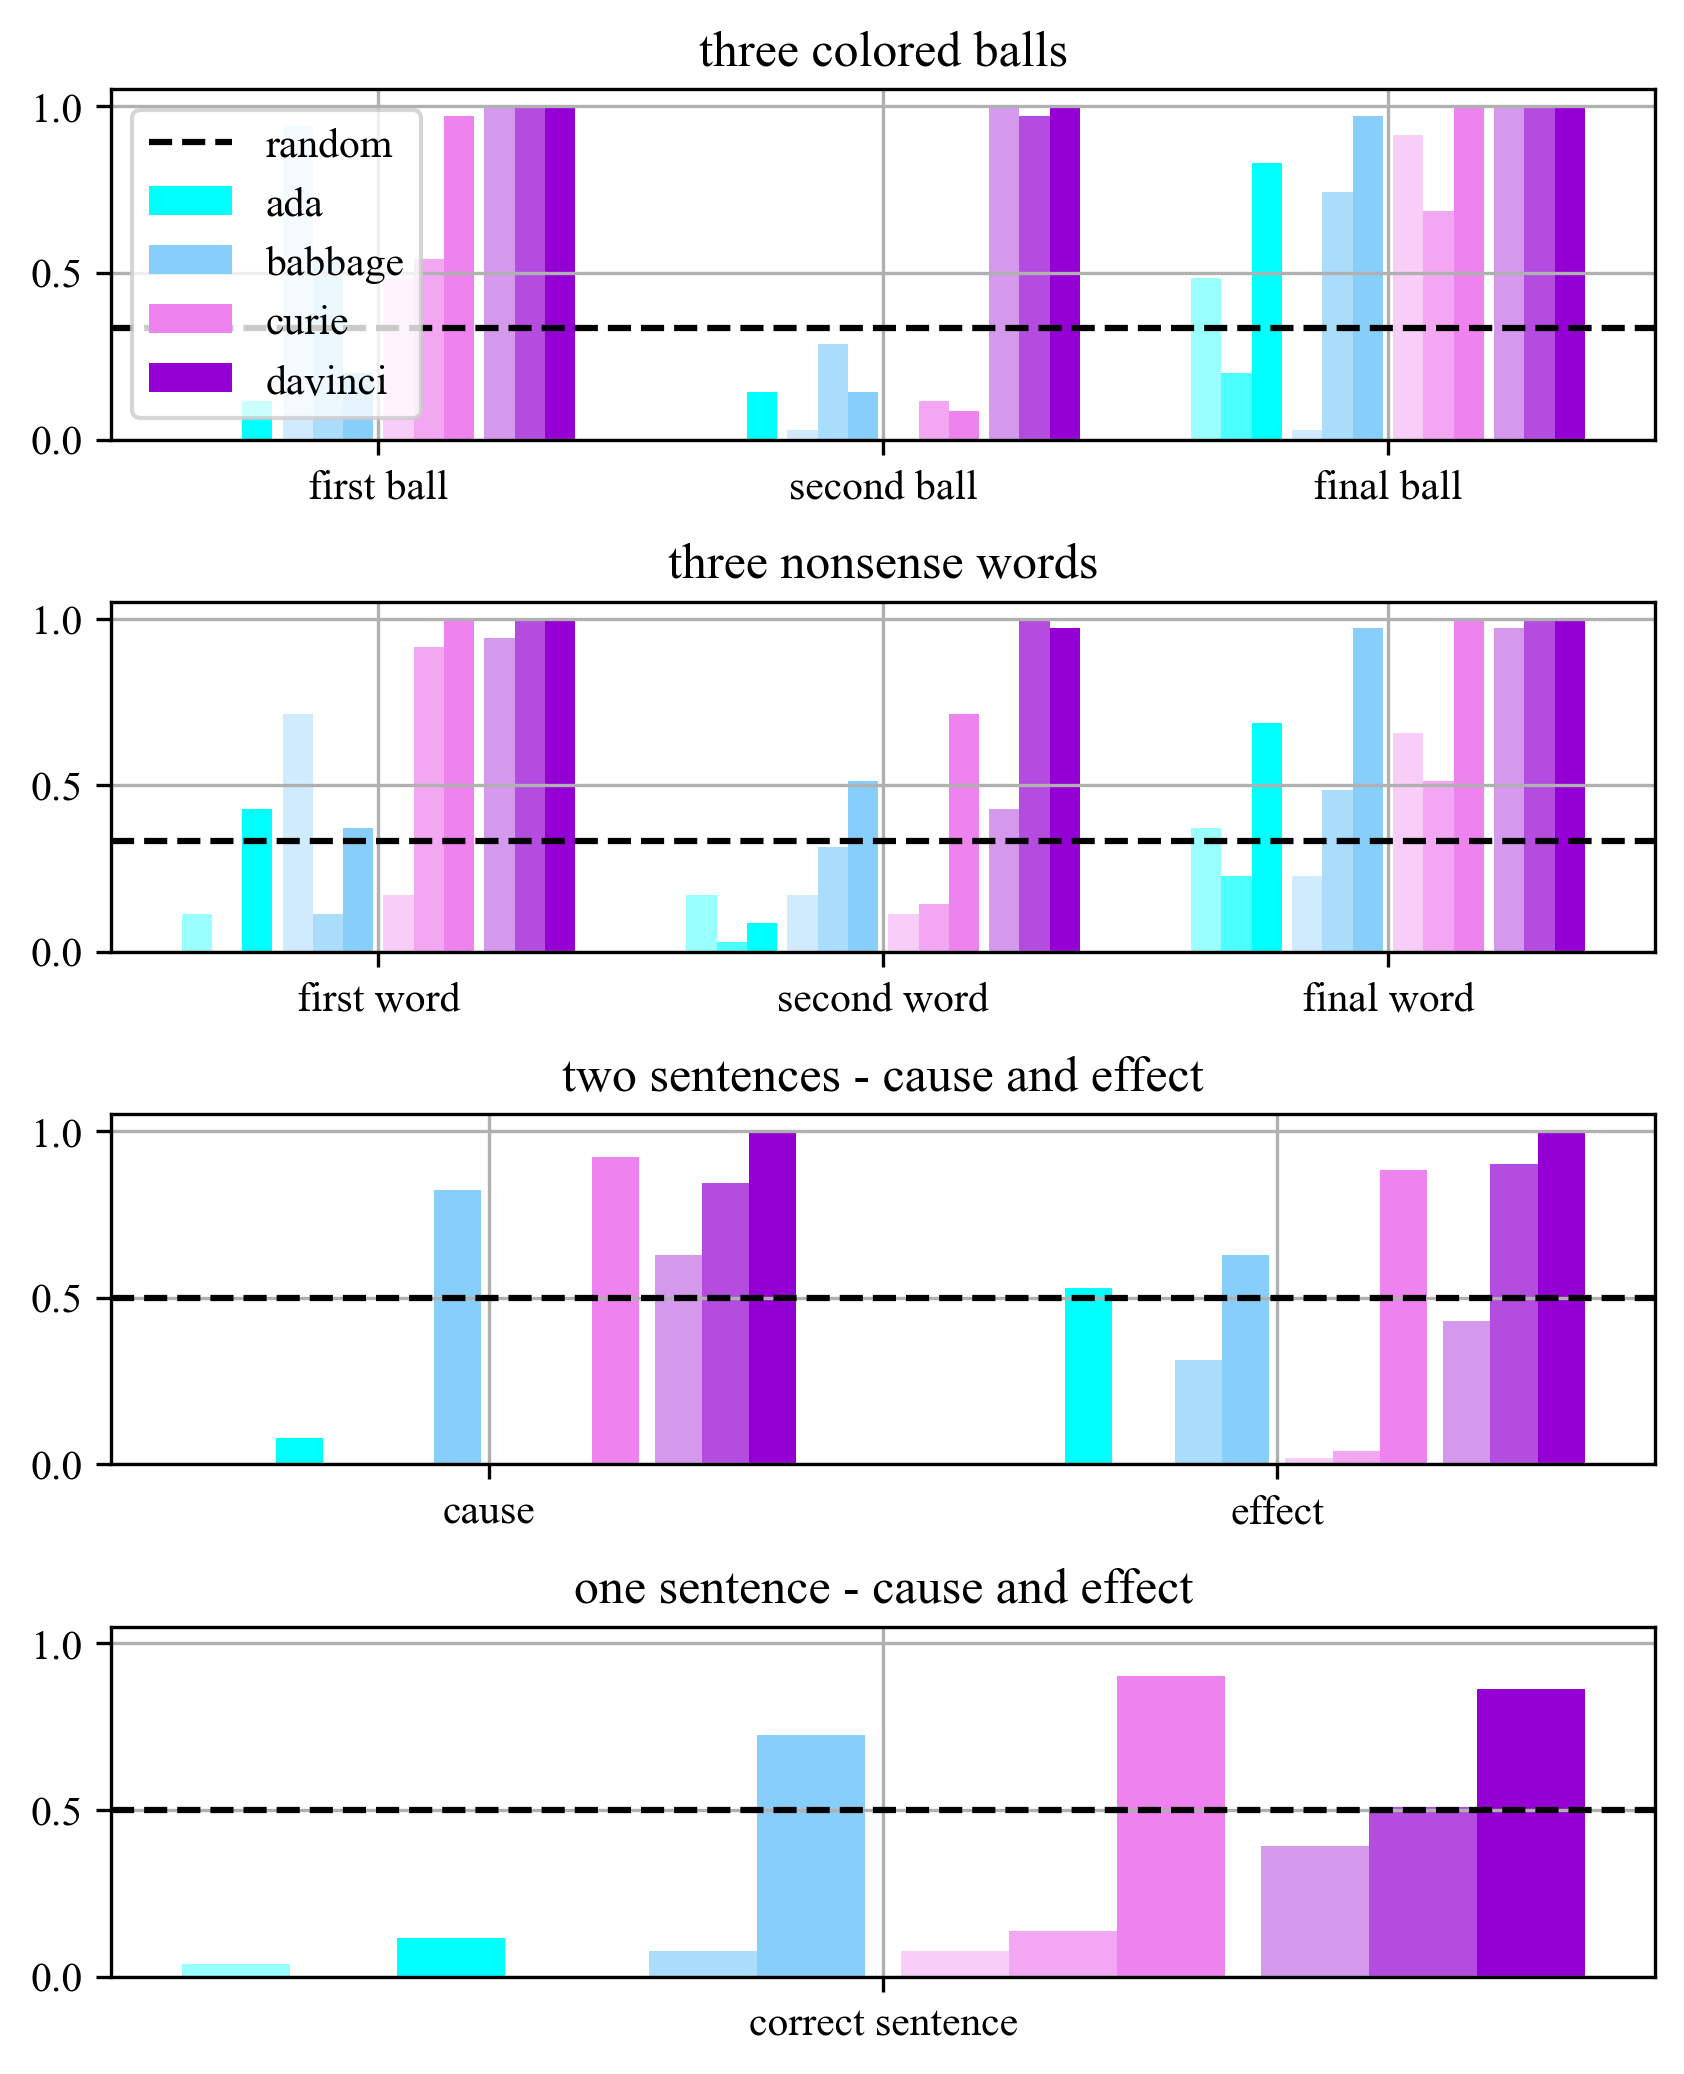

In [6]:
compare_model_sizes_across_tasks_zero_one_k_shot(save_file="figures/sizes_zero_one_k_shot.pdf")

In [25]:
#make table with averages to get the point across that shots matter and size matters

def make_size_vs_shots_grid(save_file):
    
    results_3c_zs, lengths_3c_zs = utils.compare_model_sizes_colors("data/toy_problem_3_colors_results/toy_problem_3c_zero_shot_results_{}.csv")
    results_3n_zs, lengths_3n_zs = utils.compare_model_sizes_nonsense_words("data/toy_problem_3_nonsense_words_results/toy_problem_3n_zero_shot_results_{}.csv")
    results_2s_zs, lengths_2s_zs = utils.compare_model_sizes_ce_2_sentences("data/bigbench_results/ce_two_sentences_zero_shot_results_{}.csv")
    results_1s_zs, lengths_1s_zs = utils.compare_model_sizes_ce_1_sentence("data/bigbench_results/ce_one_sentence_zero_shot_results_{}.csv")
    
    results_3c_os, lengths_3c_os = utils.compare_model_sizes_colors("data/toy_problem_3_colors_results/toy_problem_3c_one_shot_results_{}.csv")
    results_3n_os, lengths_3n_os = utils.compare_model_sizes_nonsense_words("data/toy_problem_3_nonsense_words_results/toy_problem_3n_one_shot_results_{}.csv")
    results_2s_os, lengths_2s_os = utils.compare_model_sizes_ce_2_sentences("data/bigbench_results/ce_two_sentences_one_shot_results_{}.csv")
    results_1s_os, lengths_1s_os = utils.compare_model_sizes_ce_1_sentence("data/bigbench_results/ce_one_sentence_one_shot_results_{}.csv")
    
    results_3c_ks, lengths_3c_ks = utils.compare_model_sizes_colors("data/toy_problem_3_colors_results/toy_problem_3c_k_shot_results_{}.csv")
    results_3n_ks, lengths_3n_ks = utils.compare_model_sizes_nonsense_words("data/toy_problem_3_nonsense_words_results/toy_problem_3n_k_shot_results_{}.csv")
    results_2s_ks, lengths_2s_ks = utils.compare_model_sizes_ce_2_sentences("data/bigbench_results/ce_two_sentences_k_shot_results_{}.csv")
    results_1s_ks, lengths_1s_ks = utils.compare_model_sizes_ce_1_sentence("data/bigbench_results/ce_one_sentence_k_shot_results_{}.csv")

    results_ada_zs, lengths_ada_zs = [], []
    results_ada_os, lengths_ada_os = [], []
    results_ada_ks, lengths_ada_ks = [], []
    results_babbage_zs, lengths_babbage_zs = [], []
    results_babbage_os, lengths_babbage_os = [], []
    results_babbage_ks, lengths_babbage_ks = [], []
    results_curie_zs, lengths_curie_zs = [], []
    results_curie_os, lengths_curie_os = [], []
    results_curie_ks, lengths_curie_ks = [], []
    results_davinci_zs, lengths_davinci_zs = [], []
    results_davinci_os, lengths_davinci_os = [], []
    results_davinci_ks, lengths_davinci_ks = [], []
    
    ## zero shot
    for v in [results_3c_zs, results_3n_zs, results_2s_zs, results_1s_zs]:
        results_ada_zs.append(v[0][:,1].sum())
        results_babbage_zs.append(v[1][:,1].sum())
        results_curie_zs.append(v[2][:,1].sum())
        results_davinci_zs.append(v[3][:,1].sum())
        
    for v in [lengths_3c_zs, lengths_3n_zs, lengths_2s_zs, lengths_1s_zs]:
        lengths_ada_zs.append(v[0][:,1].sum())
        lengths_babbage_zs.append(v[1][:,1].sum())
        lengths_curie_zs.append(v[2][:,1].sum())
        lengths_davinci_zs.append(v[3][:,1].sum())
        
    ## one shot
    for v in [results_3c_os, results_3n_os, results_2s_os, results_1s_os]:
        results_ada_os.append(v[0][:,1].sum())
        results_babbage_os.append(v[1][:,1].sum())
        results_curie_os.append(v[2][:,1].sum())
        results_davinci_os.append(v[3][:,1].sum())
        
    for v in [lengths_3c_os, lengths_3n_os, lengths_2s_os, lengths_1s_os]:
        lengths_ada_os.append(v[0][:,1].sum())
        lengths_babbage_os.append(v[1][:,1].sum())
        lengths_curie_os.append(v[2][:,1].sum())
        lengths_davinci_os.append(v[3][:,1].sum())    
        
    ## k=5 shot
    for v in [results_3c_ks, results_3n_ks, results_2s_ks, results_1s_ks]:
        results_ada_ks.append(v[0][:,1].sum())
        results_babbage_ks.append(v[1][:,1].sum())
        results_curie_ks.append(v[2][:,1].sum())
        results_davinci_ks.append(v[3][:,1].sum())
        
    for v in [lengths_3c_ks, lengths_3n_ks, lengths_2s_ks, lengths_1s_ks]:
        lengths_ada_ks.append(v[0][:,1].sum())
        lengths_babbage_ks.append(v[1][:,1].sum())
        lengths_curie_ks.append(v[2][:,1].sum())
        lengths_davinci_ks.append(v[3][:,1].sum())     
        
    entry_ada_zs = np.sum(results_ada_zs)/np.sum(lengths_ada_zs)
    entry_babbage_zs = np.sum(results_babbage_zs)/np.sum(lengths_babbage_zs)
    entry_curie_zs = np.sum(results_curie_zs)/np.sum(lengths_curie_zs)
    entry_davinci_zs = np.sum(results_davinci_zs)/np.sum(lengths_davinci_zs)
    
    entry_ada_os = np.sum(results_ada_os)/np.sum(lengths_ada_os)
    entry_babbage_os = np.sum(results_babbage_os)/np.sum(lengths_babbage_os)
    entry_curie_os = np.sum(results_curie_os)/np.sum(lengths_curie_os)
    entry_davinci_os = np.sum(results_davinci_os)/np.sum(lengths_davinci_os)
    
    entry_ada_ks = np.sum(results_ada_ks)/np.sum(lengths_ada_ks)
    entry_babbage_ks = np.sum(results_babbage_ks)/np.sum(lengths_babbage_ks)
    entry_curie_ks = np.sum(results_curie_ks)/np.sum(lengths_curie_ks)
    entry_davinci_ks = np.sum(results_davinci_ks)/np.sum(lengths_davinci_ks)
    
    ##### make one big graph
    grid_values = np.array([[entry_ada_zs, entry_babbage_zs, entry_curie_zs, entry_davinci_zs],
                      [entry_ada_os, entry_babbage_os, entry_curie_os, entry_davinci_os],
                      [entry_ada_ks, entry_babbage_ks, entry_curie_ks, entry_davinci_ks]])
    
    fig, ax = plt.subplots(1, 1, figsize=(figwidth, figheight), dpi=300)
    
    ax.imshow(grid_values, cmap='magma', vmin=0, vmax=1)
    
    ax.set_xticks(np.arange(4))
    ax.set_xticklabels(["ada", "babbage", "curie", "davinci"])
    ax.set_yticks(np.arange(3))
    ax.set_yticklabels(["zero-shot", "one-shot", "k=5-shot"])
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    grid_values_rounded = np.around(grid_values, 2)
    
    # Loop over data dimensions and create text annotations.
    for i in range(3):
        for j in range(4):
            text = ax.text(j, i, grid_values_rounded[i,j],
                           ha="center", va="center", color="cyan")
    
    plt.tight_layout()
    plt.savefig(save_file)
    plt.show();

<ipython-input-25-48268d97ae4a>:113: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


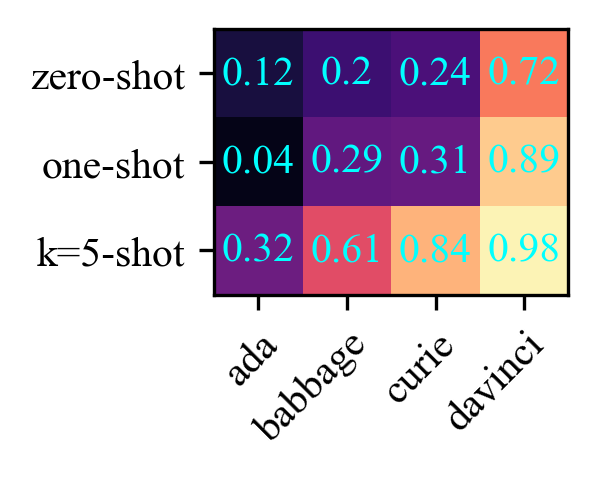

In [26]:
make_size_vs_shots_grid(save_file="figures/size_vs_shots_grid.pdf")

# Switching order

look at one model only, otherwise combinatorial explosion; use best one for paper, put others in appendix

In [9]:
def compare_switched_order_across_tasks_zero_one_k_shot(model_name="text-davinci-002", save_file="figures/switched_order_{}.pdf"):

    assert model_name in ["text-ada-001", "text-babbage-001", "text-curie-001", "text-davinci-002"]
    
    df_3c_zs = pd.read_csv("data/toy_problem_3_colors_results/toy_problem_3c_zero_shot_results_{}.csv".format(model_name))
    df_3c_os = pd.read_csv("data/toy_problem_3_colors_results/toy_problem_3c_one_shot_results_{}.csv".format(model_name))
    df_3c_ks = pd.read_csv("data/toy_problem_3_colors_results/toy_problem_3c_k_shot_results_{}.csv".format(model_name))
    results_3c_zs, lengths_3c_zs = utils.eval_df_colors(df_3c_zs)
    results_3c_os, lengths_3c_os = utils.eval_df_colors(df_3c_os)
    results_3c_ks, lengths_3c_ks = utils.eval_df_colors(df_3c_ks)
    
    df_3n_zs = pd.read_csv("data/toy_problem_3_nonsense_words_results/toy_problem_3n_zero_shot_results_{}.csv".format(model_name))
    df_3n_os = pd.read_csv("data/toy_problem_3_nonsense_words_results/toy_problem_3n_one_shot_results_{}.csv".format(model_name))
    df_3n_ks = pd.read_csv("data/toy_problem_3_nonsense_words_results/toy_problem_3n_k_shot_results_{}.csv".format(model_name))
    results_3n_zs, lengths_3n_zs = utils.eval_df_nonsense_words(df_3n_zs)
    results_3n_os, lengths_3n_os = utils.eval_df_nonsense_words(df_3n_os)
    results_3n_ks, lengths_3n_ks = utils.eval_df_nonsense_words(df_3n_ks)
    
    df_2s_zs = pd.read_csv("data/bigbench_results/ce_two_sentences_zero_shot_results_{}.csv".format(model_name))
    df_2s_os = pd.read_csv("data/bigbench_results/ce_two_sentences_one_shot_results_{}.csv".format(model_name))
    df_2s_ks = pd.read_csv("data/bigbench_results/ce_two_sentences_k_shot_results_{}.csv".format(model_name))
    results_2s_zs, lengths_2s_zs = utils.eval_df_ce_2_sentences(df_2s_zs)
    results_2s_os, lengths_2s_os = utils.eval_df_ce_2_sentences(df_2s_os)
    results_2s_ks, lengths_2s_ks = utils.eval_df_ce_2_sentences(df_2s_ks)
    
    df_1s_zs = pd.read_csv("data/bigbench_results/ce_one_sentence_zero_shot_results_{}.csv".format(model_name))
    df_1s_os = pd.read_csv("data/bigbench_results/ce_one_sentence_one_shot_results_{}.csv".format(model_name))
    df_1s_ks = pd.read_csv("data/bigbench_results/ce_one_sentence_k_shot_results_{}.csv".format(model_name))
    results_1s_zs, lengths_1s_zs = utils.eval_df_ce_1_sentence(df_1s_zs)
    results_1s_os, lengths_1s_os = utils.eval_df_ce_1_sentence(df_1s_os)
    results_1s_ks, lengths_1s_ks = utils.eval_df_ce_1_sentence(df_1s_ks)
    
    tick_labels_3c = ["first ball", "second ball", "final ball"]
    tick_labels_3n = ["first word", "second word", "final word"]
    tick_labels_2s = ["cause", "effect"]
    labels = ["normal", "switched"]
    tick_labels_1s = ["correct sentence"]
    colors = ["firebrick", "cornflowerblue"]
    alphas = [0.4, 0.7, 1]
    x3 = np.arange(3)
    x2 = np.arange(2)
    x1 = np.arange(1)
    w = 0.12
    c = 0.4
    
    fig, ax = plt.subplots(4, 1, figsize=(figwidth, 4*figheight), dpi=300)
    
    ### 3 colors
    perc = results_3c_zs / lengths_3c_zs
    ax[0].bar(x3 + (-0.8 + 0) * c, perc[:,1], width=w, color=colors[0], alpha=alphas[0])
    ax[0].bar(x3 + (-0.8 + 1) * c, perc[:,2], width=w, color=colors[1], alpha=alphas[0])
    
    perc = results_3c_os / lengths_3c_os
    ax[0].bar(x3 + (-0.5 + 0) * c, perc[:,1], width=w, color=colors[0], alpha=alphas[1])
    ax[0].bar(x3 + (-0.5 + 1) * c, perc[:,2], width=w, color=colors[1], alpha=alphas[1])
    
    perc = results_3c_ks / lengths_3c_ks
    ax[0].bar(x3 + (-0.2 + 0) * c, perc[:,1], width=w, label=labels[0], color=colors[0], alpha=alphas[2])
    ax[0].bar(x3 + (-0.2 + 1) * c, perc[:,2], width=w, label=labels[1], color=colors[1], alpha=alphas[2])
    
    ax[0].set_xticks(x3)
    ax[0].axhline(1/3, linestyle='--', color='black', label="random")
    ax[0].set_xticklabels(tick_labels_3c)
    ax[0].grid()
    ax[0].set_ylim(0,1.05)
    ax[0].legend()
    ax[0].set_title("three colored balls")
    
    ### 3 nonsense words
    perc = results_3n_zs / lengths_3n_zs
    ax[1].bar(x3 + (-0.8 + 0) * c, perc[:,1], width=w, color=colors[0], alpha=alphas[0])
    ax[1].bar(x3 + (-0.8 + 1) * c, perc[:,2], width=w, color=colors[1], alpha=alphas[0])
    
    perc = results_3n_os / lengths_3n_os
    ax[1].bar(x3 + (-0.5 + 0) * c, perc[:,1], width=w, color=colors[0], alpha=alphas[1])
    ax[1].bar(x3 + (-0.5 + 1) * c, perc[:,2], width=w, color=colors[1], alpha=alphas[1])
    
    perc = results_3n_ks / lengths_3n_ks
    ax[1].bar(x3 + (-0.2 + 0) * c, perc[:,1], width=w, label=labels[0], color=colors[0], alpha=alphas[2])
    ax[1].bar(x3 + (-0.2 + 1) * c, perc[:,2], width=w, label=labels[1], color=colors[1], alpha=alphas[2])
    
    ax[1].set_xticks(x3)
    ax[1].axhline(1/3, linestyle='--', color='black', label="random")
    ax[1].set_xticklabels(tick_labels_3n)
    ax[1].grid()
    ax[1].set_ylim(0,1.05)
    #ax[1].legend()
    ax[1].set_title("three nonsense words")
    
    ### 2 sentences
    perc = results_2s_zs / lengths_2s_zs
    ax[2].bar(x2 + (-0.8 + 0) * c, perc[:,1], width=w, color=colors[0], alpha=alphas[0])
    ax[2].bar(x2 + (-0.8 + 1) * c, perc[:,2], width=w, color=colors[1], alpha=alphas[0])
    
    perc = results_2s_os / lengths_2s_os
    ax[2].bar(x2 + (-0.5 + 0) * c, perc[:,1], width=w, color=colors[0], alpha=alphas[1])
    ax[2].bar(x2 + (-0.5 + 1) * c, perc[:,2], width=w, color=colors[1], alpha=alphas[1])
    
    perc = results_2s_ks / lengths_2s_ks
    ax[2].bar(x2 + (-0.2 + 0) * c, perc[:,1], width=w, label=labels[0], color=colors[0], alpha=alphas[2])
    ax[2].bar(x2 + (-0.2 + 1) * c, perc[:,2], width=w, label=labels[1], color=colors[1], alpha=alphas[2])
    
    ax[2].set_xticks(x2)
    ax[2].axhline(1/2, linestyle='--', color='black', label="random")
    ax[2].set_xticklabels(tick_labels_2s)
    ax[2].grid()
    ax[2].set_ylim(0,1.05)
    #ax[2].legend()
    ax[2].set_title("two sentences - cause and effect")
    
    
    ### 1 sentence
    perc = results_1s_zs / lengths_1s_zs
    ax[3].bar(x1 + (-0.8 + 0) * c, perc[:,1], width=w, color=colors[0], alpha=alphas[0])
    ax[3].bar(x1 + (-0.8 + 1) * c, perc[:,2], width=w, color=colors[1], alpha=alphas[0])
    
    perc = results_1s_os / lengths_1s_os
    ax[3].bar(x1 + (-0.5 + 0) * c, perc[:,1], width=w, color=colors[0], alpha=alphas[1])
    ax[3].bar(x1 + (-0.5 + 1) * c, perc[:,2], width=w, color=colors[1], alpha=alphas[1])
    
    perc = results_1s_ks / lengths_1s_ks
    ax[3].bar(x1 + (-0.2 + 0) * c, perc[:,1], width=w, label=labels[0], color=colors[0], alpha=alphas[2])
    ax[3].bar(x1 + (-0.2 + 1) * c, perc[:,2], width=w, label=labels[1], color=colors[1], alpha=alphas[2])
    
    ax[3].set_xticks(x1)
    ax[3].axhline(1/2, linestyle='--', color='black', label="random")
    ax[3].set_xticklabels(tick_labels_1s)
    ax[3].grid()
    ax[3].set_ylim(0,1.05)
    #ax[3].legend()
    ax[3].set_title("one sentence - cause and effect")
    
    plt.savefig(save_file.format(model_name))
    plt.show();

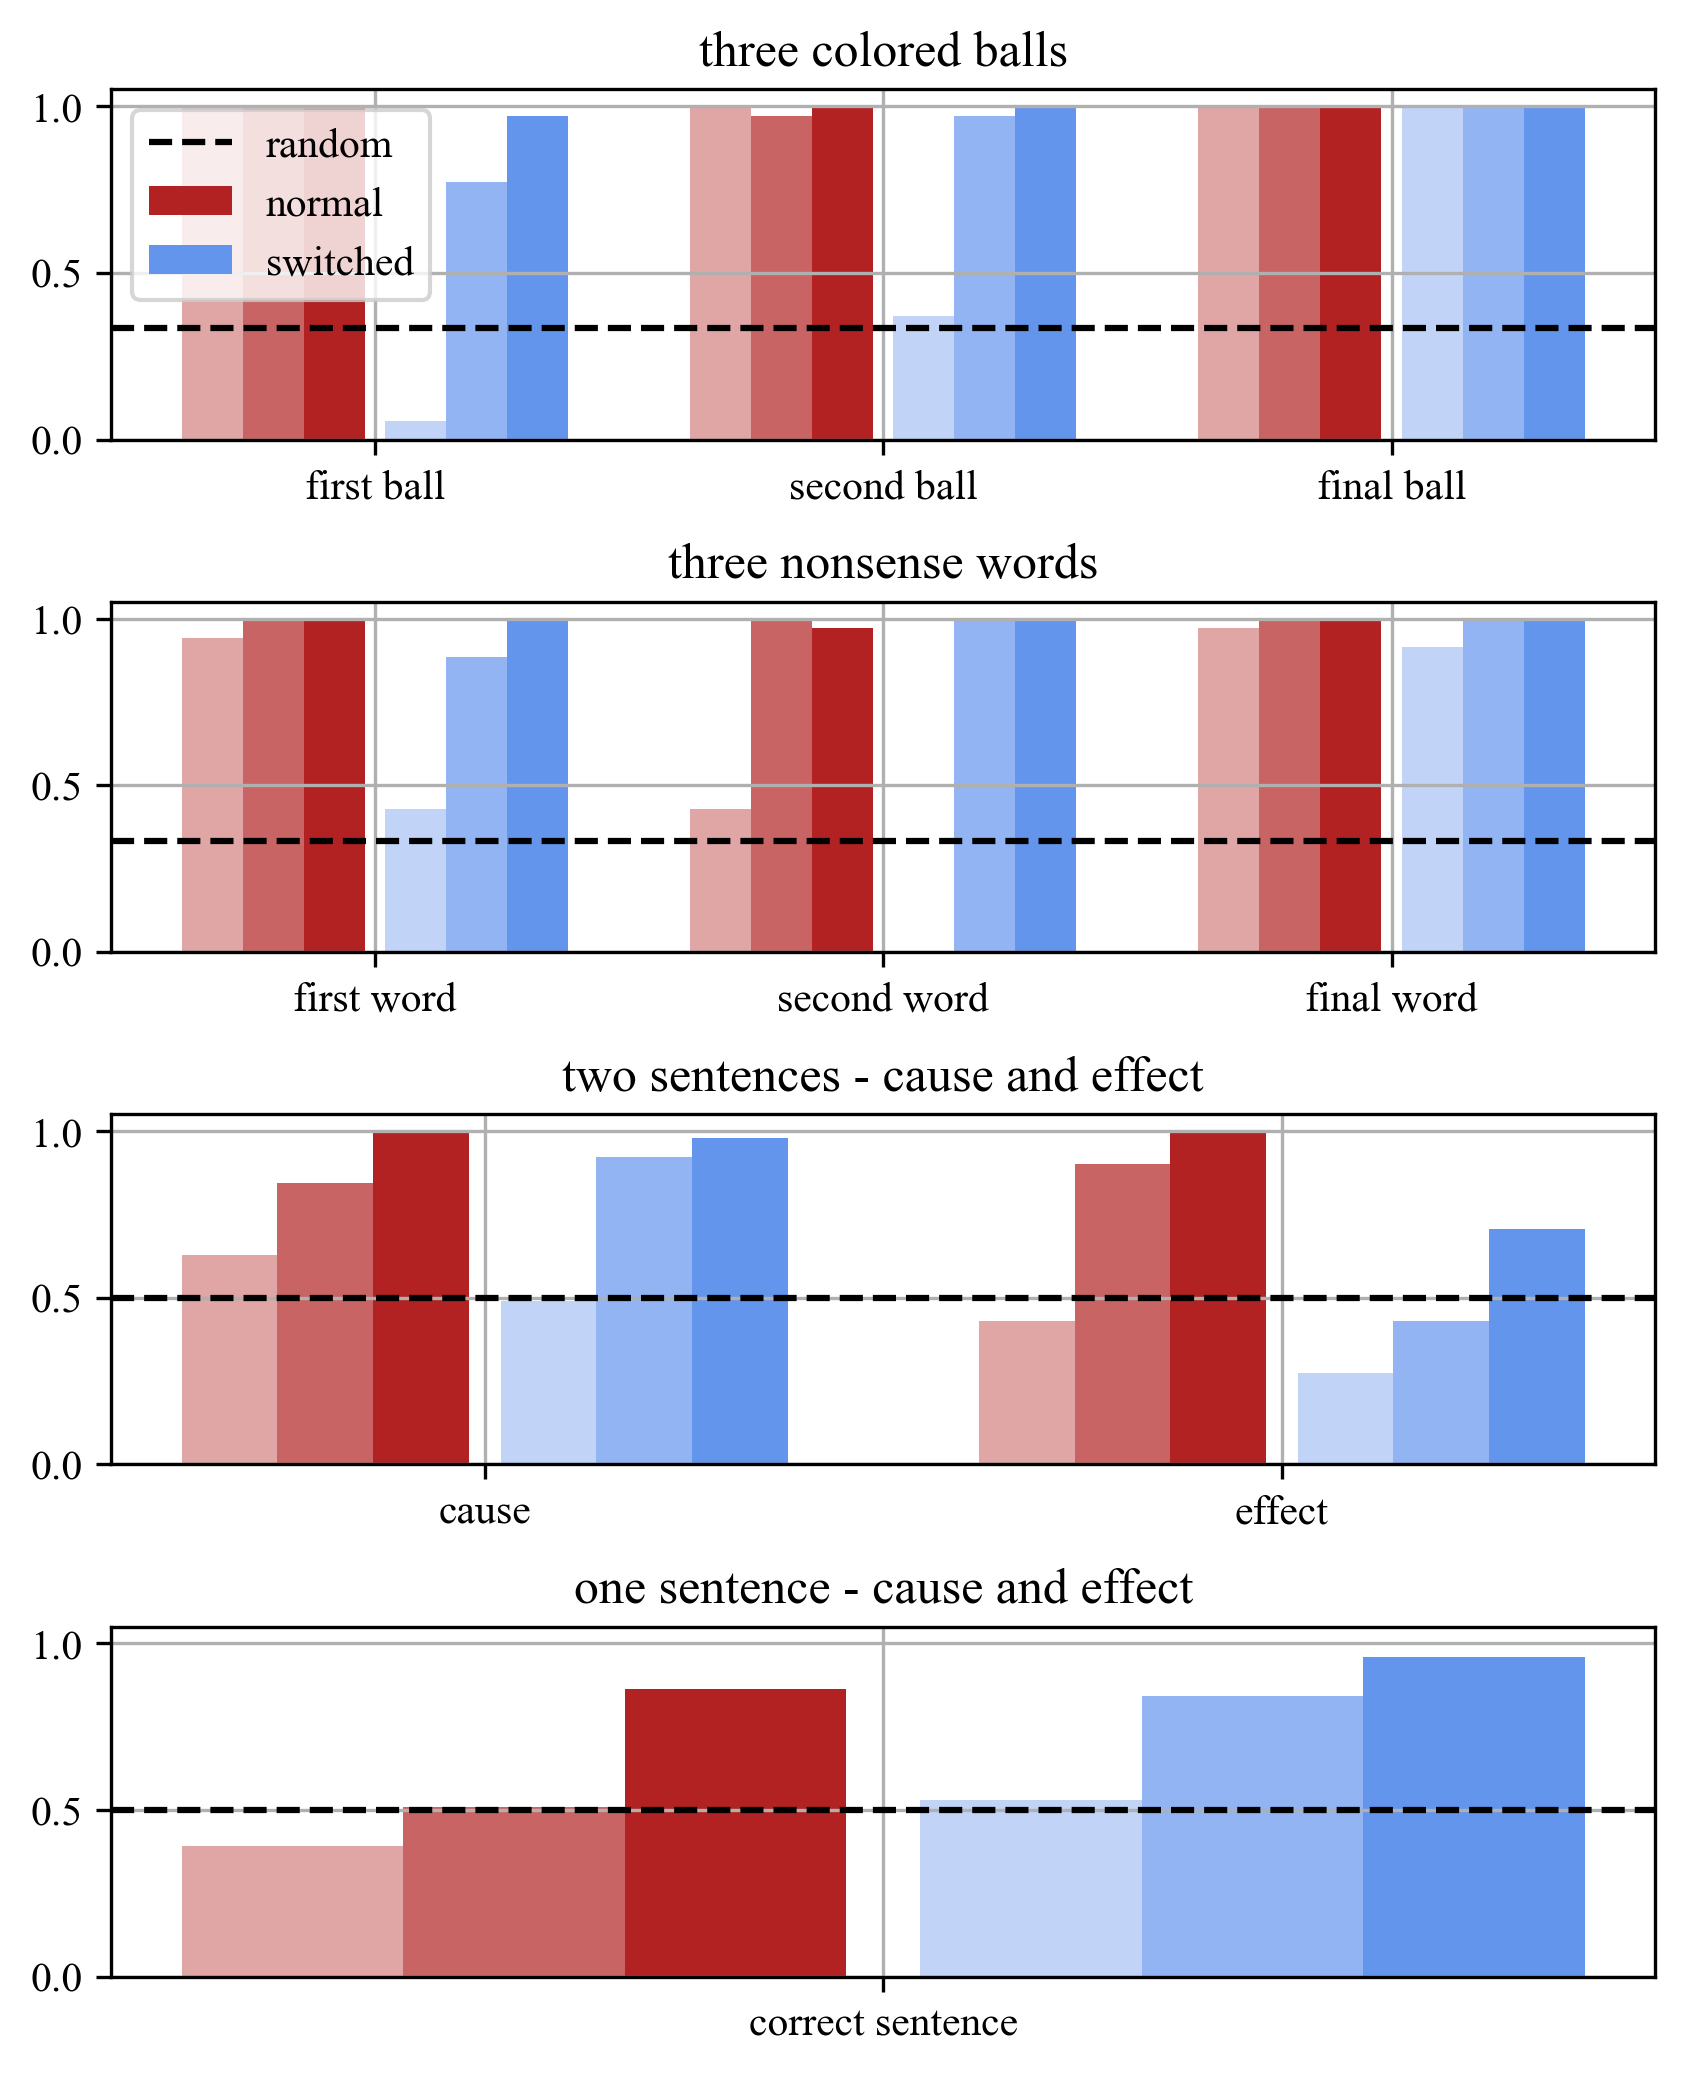

In [10]:
compare_switched_order_across_tasks_zero_one_k_shot(model_name="text-davinci-002", save_file="figures/switched_order_{}.pdf")

In [27]:
# Grid table as for previous result. This time add a second plot for switched prompts

def make_switched_size_vs_shots_grid(save_file):
    
    results_3c_zs, lengths_3c_zs = utils.compare_model_sizes_colors("data/toy_problem_3_colors_results/toy_problem_3c_zero_shot_results_{}.csv")
    results_3n_zs, lengths_3n_zs = utils.compare_model_sizes_nonsense_words("data/toy_problem_3_nonsense_words_results/toy_problem_3n_zero_shot_results_{}.csv")
    results_2s_zs, lengths_2s_zs = utils.compare_model_sizes_ce_2_sentences("data/bigbench_results/ce_two_sentences_zero_shot_results_{}.csv")
    results_1s_zs, lengths_1s_zs = utils.compare_model_sizes_ce_1_sentence("data/bigbench_results/ce_one_sentence_zero_shot_results_{}.csv")
    
    results_3c_os, lengths_3c_os = utils.compare_model_sizes_colors("data/toy_problem_3_colors_results/toy_problem_3c_one_shot_results_{}.csv")
    results_3n_os, lengths_3n_os = utils.compare_model_sizes_nonsense_words("data/toy_problem_3_nonsense_words_results/toy_problem_3n_one_shot_results_{}.csv")
    results_2s_os, lengths_2s_os = utils.compare_model_sizes_ce_2_sentences("data/bigbench_results/ce_two_sentences_one_shot_results_{}.csv")
    results_1s_os, lengths_1s_os = utils.compare_model_sizes_ce_1_sentence("data/bigbench_results/ce_one_sentence_one_shot_results_{}.csv")
    
    results_3c_ks, lengths_3c_ks = utils.compare_model_sizes_colors("data/toy_problem_3_colors_results/toy_problem_3c_k_shot_results_{}.csv")
    results_3n_ks, lengths_3n_ks = utils.compare_model_sizes_nonsense_words("data/toy_problem_3_nonsense_words_results/toy_problem_3n_k_shot_results_{}.csv")
    results_2s_ks, lengths_2s_ks = utils.compare_model_sizes_ce_2_sentences("data/bigbench_results/ce_two_sentences_k_shot_results_{}.csv")
    results_1s_ks, lengths_1s_ks = utils.compare_model_sizes_ce_1_sentence("data/bigbench_results/ce_one_sentence_k_shot_results_{}.csv")

    results_ada_zs, lengths_ada_zs = [], []
    results_ada_os, lengths_ada_os = [], []
    results_ada_ks, lengths_ada_ks = [], []
    results_babbage_zs, lengths_babbage_zs = [], []
    results_babbage_os, lengths_babbage_os = [], []
    results_babbage_ks, lengths_babbage_ks = [], []
    results_curie_zs, lengths_curie_zs = [], []
    results_curie_os, lengths_curie_os = [], []
    results_curie_ks, lengths_curie_ks = [], []
    results_davinci_zs, lengths_davinci_zs = [], []
    results_davinci_os, lengths_davinci_os = [], []
    results_davinci_ks, lengths_davinci_ks = [], []
    
    results_ada_zs_switched, lengths_ada_zs_switched = [], []
    results_ada_os_switched, lengths_ada_os_switched = [], []
    results_ada_ks_switched, lengths_ada_ks_switched = [], []
    results_babbage_zs_switched, lengths_babbage_zs_switched = [], []
    results_babbage_os_switched, lengths_babbage_os_switched = [], []
    results_babbage_ks_switched, lengths_babbage_ks_switched = [], []
    results_curie_zs_switched, lengths_curie_zs_switched = [], []
    results_curie_os_switched, lengths_curie_os_switched = [], []
    results_curie_ks_switched, lengths_curie_ks_switched = [], []
    results_davinci_zs_switched, lengths_davinci_zs_switched = [], []
    results_davinci_os_switched, lengths_davinci_os_switched = [], []
    results_davinci_ks_switched, lengths_davinci_ks_switched = [], []
    
    ## zero shot
    for v in [results_3c_zs, results_3n_zs, results_2s_zs, results_1s_zs]:
        results_ada_zs.append(v[0][:,1].sum())
        results_babbage_zs.append(v[1][:,1].sum())
        results_curie_zs.append(v[2][:,1].sum())
        results_davinci_zs.append(v[3][:,1].sum())
        results_ada_zs_switched.append(v[0][:,2].sum())
        results_babbage_zs_switched.append(v[1][:,2].sum())
        results_curie_zs_switched.append(v[2][:,2].sum())
        results_davinci_zs_switched.append(v[3][:,2].sum())
        
    for v in [lengths_3c_zs, lengths_3n_zs, lengths_2s_zs, lengths_1s_zs]:
        lengths_ada_zs.append(v[0][:,1].sum())
        lengths_babbage_zs.append(v[1][:,1].sum())
        lengths_curie_zs.append(v[2][:,1].sum())
        lengths_davinci_zs.append(v[3][:,1].sum())
        lengths_ada_zs_switched.append(v[0][:,2].sum())
        lengths_babbage_zs_switched.append(v[1][:,2].sum())
        lengths_curie_zs_switched.append(v[2][:,2].sum())
        lengths_davinci_zs_switched.append(v[3][:,2].sum())
        
    ## one shot
    for v in [results_3c_os, results_3n_os, results_2s_os, results_1s_os]:
        results_ada_os.append(v[0][:,1].sum())
        results_babbage_os.append(v[1][:,1].sum())
        results_curie_os.append(v[2][:,1].sum())
        results_davinci_os.append(v[3][:,1].sum())
        results_ada_os_switched.append(v[0][:,2].sum())
        results_babbage_os_switched.append(v[1][:,2].sum())
        results_curie_os_switched.append(v[2][:,2].sum())
        results_davinci_os_switched.append(v[3][:,2].sum())
        
    for v in [lengths_3c_os, lengths_3n_os, lengths_2s_os, lengths_1s_os]:
        lengths_ada_os.append(v[0][:,1].sum())
        lengths_babbage_os.append(v[1][:,1].sum())
        lengths_curie_os.append(v[2][:,1].sum())
        lengths_davinci_os.append(v[3][:,1].sum())   
        lengths_ada_os_switched.append(v[0][:,2].sum())
        lengths_babbage_os_switched.append(v[1][:,2].sum())
        lengths_curie_os_switched.append(v[2][:,2].sum())
        lengths_davinci_os_switched.append(v[3][:,2].sum())  
        
    ## k=5 shot
    for v in [results_3c_ks, results_3n_ks, results_2s_ks, results_1s_ks]:
        results_ada_ks.append(v[0][:,1].sum())
        results_babbage_ks.append(v[1][:,1].sum())
        results_curie_ks.append(v[2][:,1].sum())
        results_davinci_ks.append(v[3][:,1].sum())
        results_ada_ks_switched.append(v[0][:,2].sum())
        results_babbage_ks_switched.append(v[1][:,2].sum())
        results_curie_ks_switched.append(v[2][:,2].sum())
        results_davinci_ks_switched.append(v[3][:,2].sum())
        
    for v in [lengths_3c_ks, lengths_3n_ks, lengths_2s_ks, lengths_1s_ks]:
        lengths_ada_ks.append(v[0][:,1].sum())
        lengths_babbage_ks.append(v[1][:,1].sum())
        lengths_curie_ks.append(v[2][:,1].sum())
        lengths_davinci_ks.append(v[3][:,1].sum())  
        lengths_ada_ks_switched.append(v[0][:,2].sum())
        lengths_babbage_ks_switched.append(v[1][:,2].sum())
        lengths_curie_ks_switched.append(v[2][:,2].sum())
        lengths_davinci_ks_switched.append(v[3][:,2].sum()) 
        
    entry_ada_zs = np.sum(results_ada_zs)/np.sum(lengths_ada_zs)
    entry_babbage_zs = np.sum(results_babbage_zs)/np.sum(lengths_babbage_zs)
    entry_curie_zs = np.sum(results_curie_zs)/np.sum(lengths_curie_zs)
    entry_davinci_zs = np.sum(results_davinci_zs)/np.sum(lengths_davinci_zs)
    entry_ada_zs_switched = np.sum(results_ada_zs_switched)/np.sum(lengths_ada_zs_switched)
    entry_babbage_zs_switched = np.sum(results_babbage_zs_switched)/np.sum(lengths_babbage_zs_switched)
    entry_curie_zs_switched = np.sum(results_curie_zs_switched)/np.sum(lengths_curie_zs_switched)
    entry_davinci_zs_switched = np.sum(results_davinci_zs_switched)/np.sum(lengths_davinci_zs_switched)
    
    entry_ada_os = np.sum(results_ada_os)/np.sum(lengths_ada_os)
    entry_babbage_os = np.sum(results_babbage_os)/np.sum(lengths_babbage_os)
    entry_curie_os = np.sum(results_curie_os)/np.sum(lengths_curie_os)
    entry_davinci_os = np.sum(results_davinci_os)/np.sum(lengths_davinci_os)
    entry_ada_os_switched = np.sum(results_ada_os_switched)/np.sum(lengths_ada_os_switched)
    entry_babbage_os_switched = np.sum(results_babbage_os_switched)/np.sum(lengths_babbage_os_switched)
    entry_curie_os_switched = np.sum(results_curie_os_switched)/np.sum(lengths_curie_os_switched)
    entry_davinci_os_switched = np.sum(results_davinci_os_switched)/np.sum(lengths_davinci_os_switched)
    
    entry_ada_ks = np.sum(results_ada_ks)/np.sum(lengths_ada_ks)
    entry_babbage_ks = np.sum(results_babbage_ks)/np.sum(lengths_babbage_ks)
    entry_curie_ks = np.sum(results_curie_ks)/np.sum(lengths_curie_ks)
    entry_davinci_ks = np.sum(results_davinci_ks)/np.sum(lengths_davinci_ks)
    entry_ada_ks_switched = np.sum(results_ada_ks_switched)/np.sum(lengths_ada_ks_switched)
    entry_babbage_ks_switched = np.sum(results_babbage_ks_switched)/np.sum(lengths_babbage_ks_switched)
    entry_curie_ks_switched = np.sum(results_curie_ks_switched)/np.sum(lengths_curie_ks_switched)
    entry_davinci_ks_switched = np.sum(results_davinci_ks_switched)/np.sum(lengths_davinci_ks_switched)
    
    ##### make one big graph
    grid_values = np.array([[entry_ada_zs, entry_babbage_zs, entry_curie_zs, entry_davinci_zs],
                      [entry_ada_os, entry_babbage_os, entry_curie_os, entry_davinci_os],
                      [entry_ada_ks, entry_babbage_ks, entry_curie_ks, entry_davinci_ks]])
    
    grid_values_switched = np.array([[entry_ada_zs_switched, entry_babbage_zs_switched, entry_curie_zs_switched, entry_davinci_zs_switched],
                      [entry_ada_os_switched, entry_babbage_os_switched, entry_curie_os_switched, entry_davinci_os_switched],
                      [entry_ada_ks_switched, entry_babbage_ks_switched, entry_curie_ks_switched, entry_davinci_ks_switched]])
    
    fig, ax = plt.subplots(1, 2, figsize=(figwidth, 2*figheight), dpi=300, sharey=True)
    
    ax[0].imshow(grid_values, cmap='magma', vmin=0, vmax=1)
    ax[0].set_xticks(np.arange(4))
    ax[0].set_xticklabels(["ada", "babbage", "curie", "davinci"])
    ax[0].set_yticks(np.arange(3))
    ax[0].set_yticklabels(["zero-shot", "one-shot", "k=5-shot"])
    ax[0].set_title("shot normal, prompt normal")
    
    ax[1].imshow(grid_values_switched, cmap='magma', vmin=0, vmax=1)
    ax[1].set_xticks(np.arange(4))
    ax[1].set_xticklabels(["ada", "babbage", "curie", "davinci"])
#    ax[1].set_yticks(np.arange(3))
#    ax[1].set_yticklabels(["zero-shot", "one-shot", "k=5-shot"])
    ax[1].set_title("shot switched, prompt switched")
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    grid_values_rounded = np.around(grid_values, 2)
    grid_values_switched_rounded = np.around(grid_values_switched, 2)
    
    # Loop over data dimensions and create text annotations.
    for i in range(3):
        for j in range(4):
            text = ax[0].text(j, i, grid_values_rounded[i,j],
                           ha="center", va="center", color="cyan")
            text = ax[1].text(j, i, grid_values_switched_rounded[i,j],
                           ha="center", va="center", color="cyan")
    
    plt.tight_layout()
    plt.savefig(save_file)
    plt.show();

<ipython-input-27-c9603341ff62>:178: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


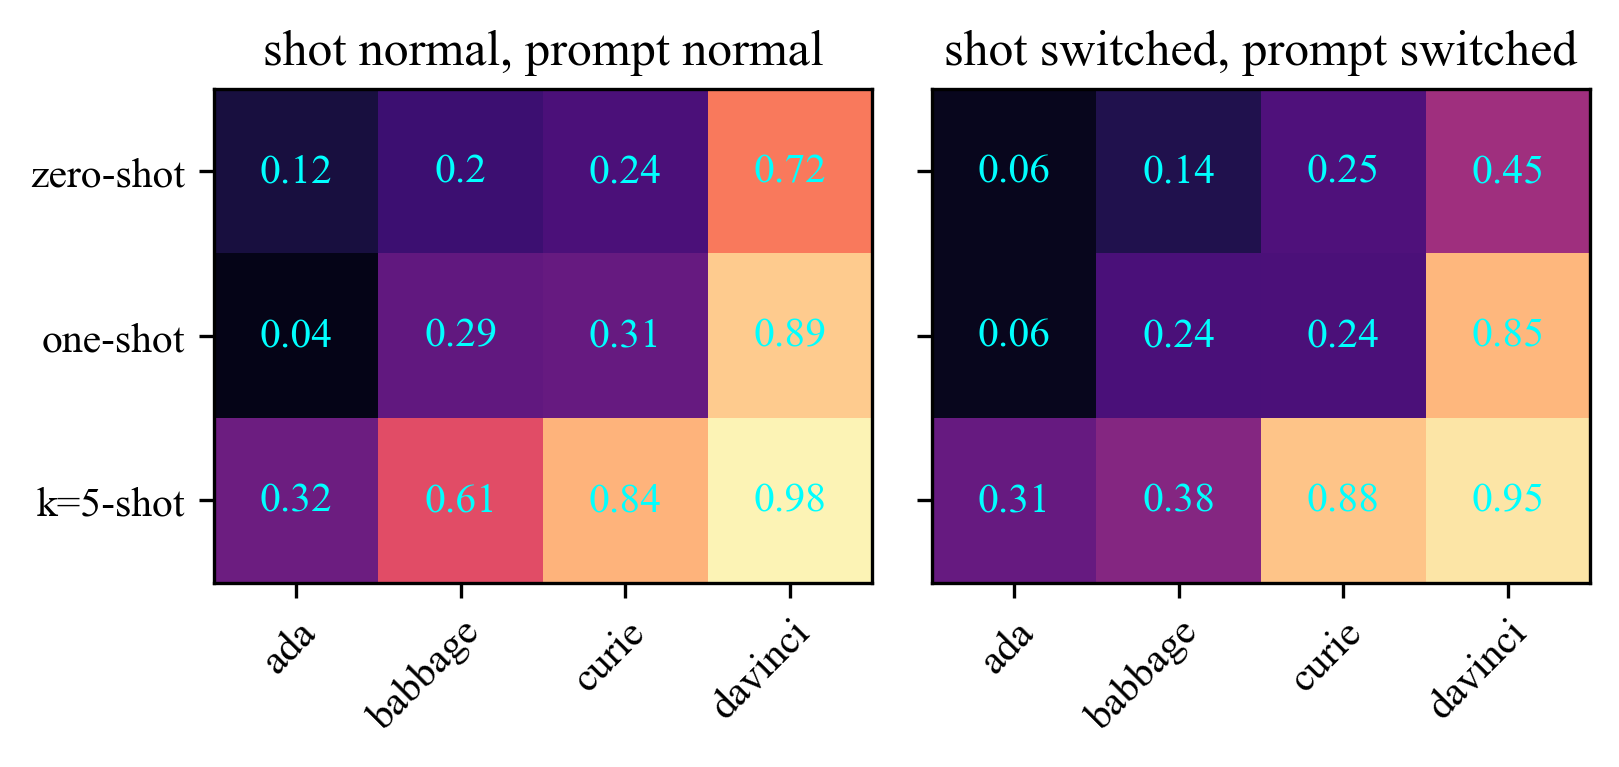

In [28]:
make_switched_size_vs_shots_grid(save_file="figures/size_vs_shots_switched_grid.pdf")

# Switching order of prompts vs. shots

In [13]:
def compare_switched_order_across_tasks_zero_one_k_shot_switched_shot(model_name="text-davinci-002", save_file="figures/switched_order_{}.pdf"):

    assert model_name in ["text-ada-001", "text-babbage-001", "text-curie-001", "text-davinci-002"]
    
    df_3c_zs = pd.read_csv("data/toy_problem_3_colors_results/toy_problem_3c_zero_shot_results_{}.csv".format(model_name))
    df_3c_os = pd.read_csv("data/toy_problem_3_colors_results/toy_problem_3c_one_shot_results_{}.csv".format(model_name))
    df_3c_ks = pd.read_csv("data/toy_problem_3_colors_results/toy_problem_3c_k_shot_results_{}.csv".format(model_name))
    results_3c_zs, lengths_3c_zs = utils.eval_df_colors(df_3c_zs)
    results_3c_os, lengths_3c_os = utils.eval_df_colors(df_3c_os)
    results_3c_ks, lengths_3c_ks = utils.eval_df_colors(df_3c_ks)
    results_3c_os_ss, lengths_3c_os_ss = utils.eval_df_colors(df_3c_os, switched_shot=True)
    results_3c_ks_ss, lengths_3c_ks_ss = utils.eval_df_colors(df_3c_ks, switched_shot=True)
    
    df_3n_zs = pd.read_csv("data/toy_problem_3_nonsense_words_results/toy_problem_3n_zero_shot_results_{}.csv".format(model_name))
    df_3n_os = pd.read_csv("data/toy_problem_3_nonsense_words_results/toy_problem_3n_one_shot_results_{}.csv".format(model_name))
    df_3n_ks = pd.read_csv("data/toy_problem_3_nonsense_words_results/toy_problem_3n_k_shot_results_{}.csv".format(model_name))
    results_3n_zs, lengths_3n_zs = utils.eval_df_nonsense_words(df_3n_zs)
    results_3n_os, lengths_3n_os = utils.eval_df_nonsense_words(df_3n_os)
    results_3n_ks, lengths_3n_ks = utils.eval_df_nonsense_words(df_3n_ks)
    results_3n_os_ss, lengths_3n_os_ss = utils.eval_df_nonsense_words(df_3n_os, switched_shot=True)
    results_3n_ks_ss, lengths_3n_ks_ss = utils.eval_df_nonsense_words(df_3n_ks, switched_shot=True)
    
    df_2s_zs = pd.read_csv("data/bigbench_results/ce_two_sentences_zero_shot_results_{}.csv".format(model_name))
    df_2s_os = pd.read_csv("data/bigbench_results/ce_two_sentences_one_shot_results_{}.csv".format(model_name))
    df_2s_ks = pd.read_csv("data/bigbench_results/ce_two_sentences_k_shot_results_{}.csv".format(model_name))
    results_2s_zs, lengths_2s_zs = utils.eval_df_ce_2_sentences(df_2s_zs)
    results_2s_os, lengths_2s_os = utils.eval_df_ce_2_sentences(df_2s_os)
    results_2s_ks, lengths_2s_ks = utils.eval_df_ce_2_sentences(df_2s_ks)
    results_2s_os_ss, lengths_2s_os_ss = utils.eval_df_ce_2_sentences(df_2s_os, switched_shot=True)
    results_2s_ks_ss, lengths_2s_ks_ss = utils.eval_df_ce_2_sentences(df_2s_ks, switched_shot=True)
    
    df_1s_zs = pd.read_csv("data/bigbench_results/ce_one_sentence_zero_shot_results_{}.csv".format(model_name))
    df_1s_os = pd.read_csv("data/bigbench_results/ce_one_sentence_one_shot_results_{}.csv".format(model_name))
    df_1s_ks = pd.read_csv("data/bigbench_results/ce_one_sentence_k_shot_results_{}.csv".format(model_name))
    results_1s_zs, lengths_1s_zs = utils.eval_df_ce_1_sentence(df_1s_zs)
    results_1s_os, lengths_1s_os = utils.eval_df_ce_1_sentence(df_1s_os)
    results_1s_ks, lengths_1s_ks = utils.eval_df_ce_1_sentence(df_1s_ks)
    results_1s_os_ss, lengths_1s_os_ss = utils.eval_df_ce_1_sentence(df_1s_os, switched_shot=True)
    results_1s_ks_ss, lengths_1s_ks_ss = utils.eval_df_ce_1_sentence(df_1s_ks, switched_shot=True)
    
    tick_labels_3c = ["first ball", "second ball", "final ball"]
    tick_labels_3n = ["first word", "second word", "final word"]
    tick_labels_2s = ["cause", "effect"]
    labels = ["normal", "shot switched, prompt normal", "shot normal, prompt switched", "both switched"]
    tick_labels_1s = ["correct sentence"]
    colors = ["firebrick", "limegreen", "darkorange", "cornflowerblue"]
    alphas = [0.4, 0.7, 1]
    x3 = np.arange(3)
    x2 = np.arange(2)
    x1 = np.arange(1)
    w = 0.06
    c = 0.2
    
    fig, ax = plt.subplots(4, 1, figsize=(figwidth, 4*figheight), dpi=300)
    
    ### 3 colors
    perc = results_3c_zs / lengths_3c_zs
    ax[0].bar(x3 + (-1.8 + 0) * c, perc[:,1], width=w, color=colors[0], alpha=alphas[0])
    ax[0].bar(x3 + (-1.8 + 3) * c, perc[:,2], width=w, color=colors[3], alpha=alphas[0])
    
    perc = results_3c_os / lengths_3c_os
    perc_ss = results_3c_os_ss / lengths_3c_os_ss
    ax[0].bar(x3 + (-1.5 + 0) * c, perc[:,1], width=w, color=colors[0], alpha=alphas[1])
    ax[0].bar(x3 + (-1.5 + 1) * c, perc_ss[:,1], width=w, color=colors[1], alpha=alphas[1])
    ax[0].bar(x3 + (-1.5 + 2) * c, perc_ss[:,2], width=w, color=colors[2], alpha=alphas[1])
    ax[0].bar(x3 + (-1.5 + 3) * c, perc[:,2], width=w, color=colors[3], alpha=alphas[1])
    
    perc = results_3c_ks / lengths_3c_ks
    perc_ss = results_3c_ks_ss / lengths_3c_ks_ss
    ax[0].bar(x3 + (-1.2 + 0) * c, perc[:,1], width=w, label=labels[0], color=colors[0], alpha=alphas[2])
    ax[0].bar(x3 + (-1.2 + 1) * c, perc_ss[:,1], width=w, label=labels[1], color=colors[1], alpha=alphas[2])
    ax[0].bar(x3 + (-1.2 + 2) * c, perc_ss[:,2], width=w, label=labels[2], color=colors[2], alpha=alphas[2])
    ax[0].bar(x3 + (-1.2 + 3) * c, perc[:,2], width=w, label=labels[3], color=colors[3], alpha=alphas[2])
    
    ax[0].set_xticks(x3)
    ax[0].axhline(1/3, linestyle='--', color='black', label="random")
    ax[0].set_xticklabels(tick_labels_3c)
    ax[0].grid()
    ax[0].set_ylim(0,1.05)
    ax[0].legend()
    ax[0].set_title("three colored balls")
    
    ### 3 nonsense words
    perc = results_3n_zs / lengths_3n_zs
    ax[1].bar(x3 + (-1.8 + 0) * c, perc[:,1], width=w, color=colors[0], alpha=alphas[0])
    ax[1].bar(x3 + (-1.8 + 3) * c, perc[:,2], width=w, color=colors[3], alpha=alphas[0])
    
    perc = results_3n_os / lengths_3n_os
    perc_ss = results_3n_os_ss / lengths_3n_os_ss
    ax[1].bar(x3 + (-1.5 + 0) * c, perc[:,1], width=w, color=colors[0], alpha=alphas[1])
    ax[1].bar(x3 + (-1.5 + 1) * c, perc_ss[:,1], width=w, color=colors[1], alpha=alphas[1])
    ax[1].bar(x3 + (-1.5 + 2) * c, perc_ss[:,2], width=w, color=colors[2], alpha=alphas[1])
    ax[1].bar(x3 + (-1.5 + 3) * c, perc[:,2], width=w, color=colors[3], alpha=alphas[1])
    
    perc = results_3n_ks / lengths_3n_ks
    perc_ss = results_3n_ks_ss / lengths_3n_ks_ss
    ax[1].bar(x3 + (-1.2 + 0) * c, perc[:,1], width=w, label=labels[0], color=colors[0], alpha=alphas[2])
    ax[1].bar(x3 + (-1.2 + 1) * c, perc_ss[:,1], width=w, label=labels[1], color=colors[1], alpha=alphas[2])
    ax[1].bar(x3 + (-1.2 + 2) * c, perc_ss[:,2], width=w, label=labels[2], color=colors[2], alpha=alphas[2])
    ax[1].bar(x3 + (-1.2 + 3) * c, perc[:,2], width=w, label=labels[3], color=colors[3], alpha=alphas[2])
    
    ax[1].set_xticks(x3)
    ax[1].axhline(1/3, linestyle='--', color='black', label="random")
    ax[1].set_xticklabels(tick_labels_3n)
    ax[1].grid()
    ax[1].set_ylim(0,1.05)
    #ax[1].legend()
    ax[1].set_title("three nonsense words")
    
    ### 2 sentences
    perc = results_2s_zs / lengths_2s_zs
    ax[2].bar(x2 + (-1.8 + 0) * c, perc[:,1], width=w, color=colors[0], alpha=alphas[0])
    ax[2].bar(x2 + (-1.8 + 3) * c, perc[:,2], width=w, color=colors[3], alpha=alphas[0])
    
    perc = results_2s_os / lengths_2s_os
    perc_ss = results_2s_os_ss / lengths_2s_os_ss
    ax[2].bar(x2 + (-1.5 + 0) * c, perc[:,1], width=w, color=colors[0], alpha=alphas[1])
    ax[2].bar(x2 + (-1.5 + 1) * c, perc_ss[:,1], width=w, color=colors[1], alpha=alphas[1])
    ax[2].bar(x2 + (-1.5 + 2) * c, perc_ss[:,2], width=w, color=colors[2], alpha=alphas[1])
    ax[2].bar(x2 + (-1.5 + 3) * c, perc[:,2], width=w, color=colors[3], alpha=alphas[1])
    
    perc = results_2s_ks / lengths_2s_ks
    perc_ss = results_2s_ks_ss / lengths_2s_ks_ss
    ax[2].bar(x2 + (-1.2 + 0) * c, perc[:,1], width=w, label=labels[0], color=colors[0], alpha=alphas[2])
    ax[2].bar(x2 + (-1.2 + 1) * c, perc_ss[:,1], width=w, label=labels[1], color=colors[1], alpha=alphas[2])
    ax[2].bar(x2 + (-1.2 + 2) * c, perc_ss[:,2], width=w, label=labels[2], color=colors[2], alpha=alphas[2])
    ax[2].bar(x2 + (-1.2 + 3) * c, perc[:,2], width=w, label=labels[3], color=colors[3], alpha=alphas[2])
    
    ax[2].set_xticks(x2)
    ax[2].axhline(1/2, linestyle='--', color='black', label="random")
    ax[2].set_xticklabels(tick_labels_2s)
    ax[2].grid()
    ax[2].set_ylim(0,1.05)
    #ax[2].legend()
    ax[2].set_title("two sentences - cause and effect")
    
    
    ### 1 sentence
    perc = results_1s_zs / lengths_1s_zs
    ax[3].bar(x1 + (-1.8 + 0) * c, perc[:,1], width=w, color=colors[0], alpha=alphas[0])
    ax[3].bar(x1 + (-1.8 + 3) * c, perc[:,2], width=w, color=colors[3], alpha=alphas[0])
    
    perc = results_1s_os / lengths_1s_os
    perc_ss = results_1s_os_ss / lengths_1s_os_ss
    ax[3].bar(x1 + (-1.5 + 0) * c, perc[:,1], width=w, color=colors[0], alpha=alphas[1])
    ax[3].bar(x1 + (-1.5 + 1) * c, perc_ss[:,1], width=w, color=colors[1], alpha=alphas[1])
    ax[3].bar(x1 + (-1.5 + 2) * c, perc_ss[:,2], width=w, color=colors[2], alpha=alphas[1])
    ax[3].bar(x1 + (-1.5 + 3) * c, perc[:,2], width=w, color=colors[3], alpha=alphas[1])
    
    perc = results_1s_ks / lengths_1s_ks
    perc_ss = results_1s_ks_ss / lengths_1s_ks_ss
    ax[3].bar(x1 + (-1.2 + 0) * c, perc[:,1], width=w, label=labels[0], color=colors[0], alpha=alphas[2])
    ax[3].bar(x1 + (-1.2 + 1) * c, perc_ss[:,1], width=w, label=labels[1], color=colors[1], alpha=alphas[2])
    ax[3].bar(x1 + (-1.2 + 2) * c, perc_ss[:,2], width=w, label=labels[2], color=colors[2], alpha=alphas[2])
    ax[3].bar(x1 + (-1.2 + 3) * c, perc[:,2], width=w, label=labels[3], color=colors[3], alpha=alphas[2])
    
    ax[3].set_xticks(x1)
    ax[3].axhline(1/2, linestyle='--', color='black', label="random")
    ax[3].set_xticklabels(tick_labels_1s)
    ax[3].grid()
    ax[3].set_ylim(0,1.05)
    #ax[3].legend()
    ax[3].set_title("one sentence - cause and effect")
    
    plt.savefig(save_file.format(model_name))
    plt.show();

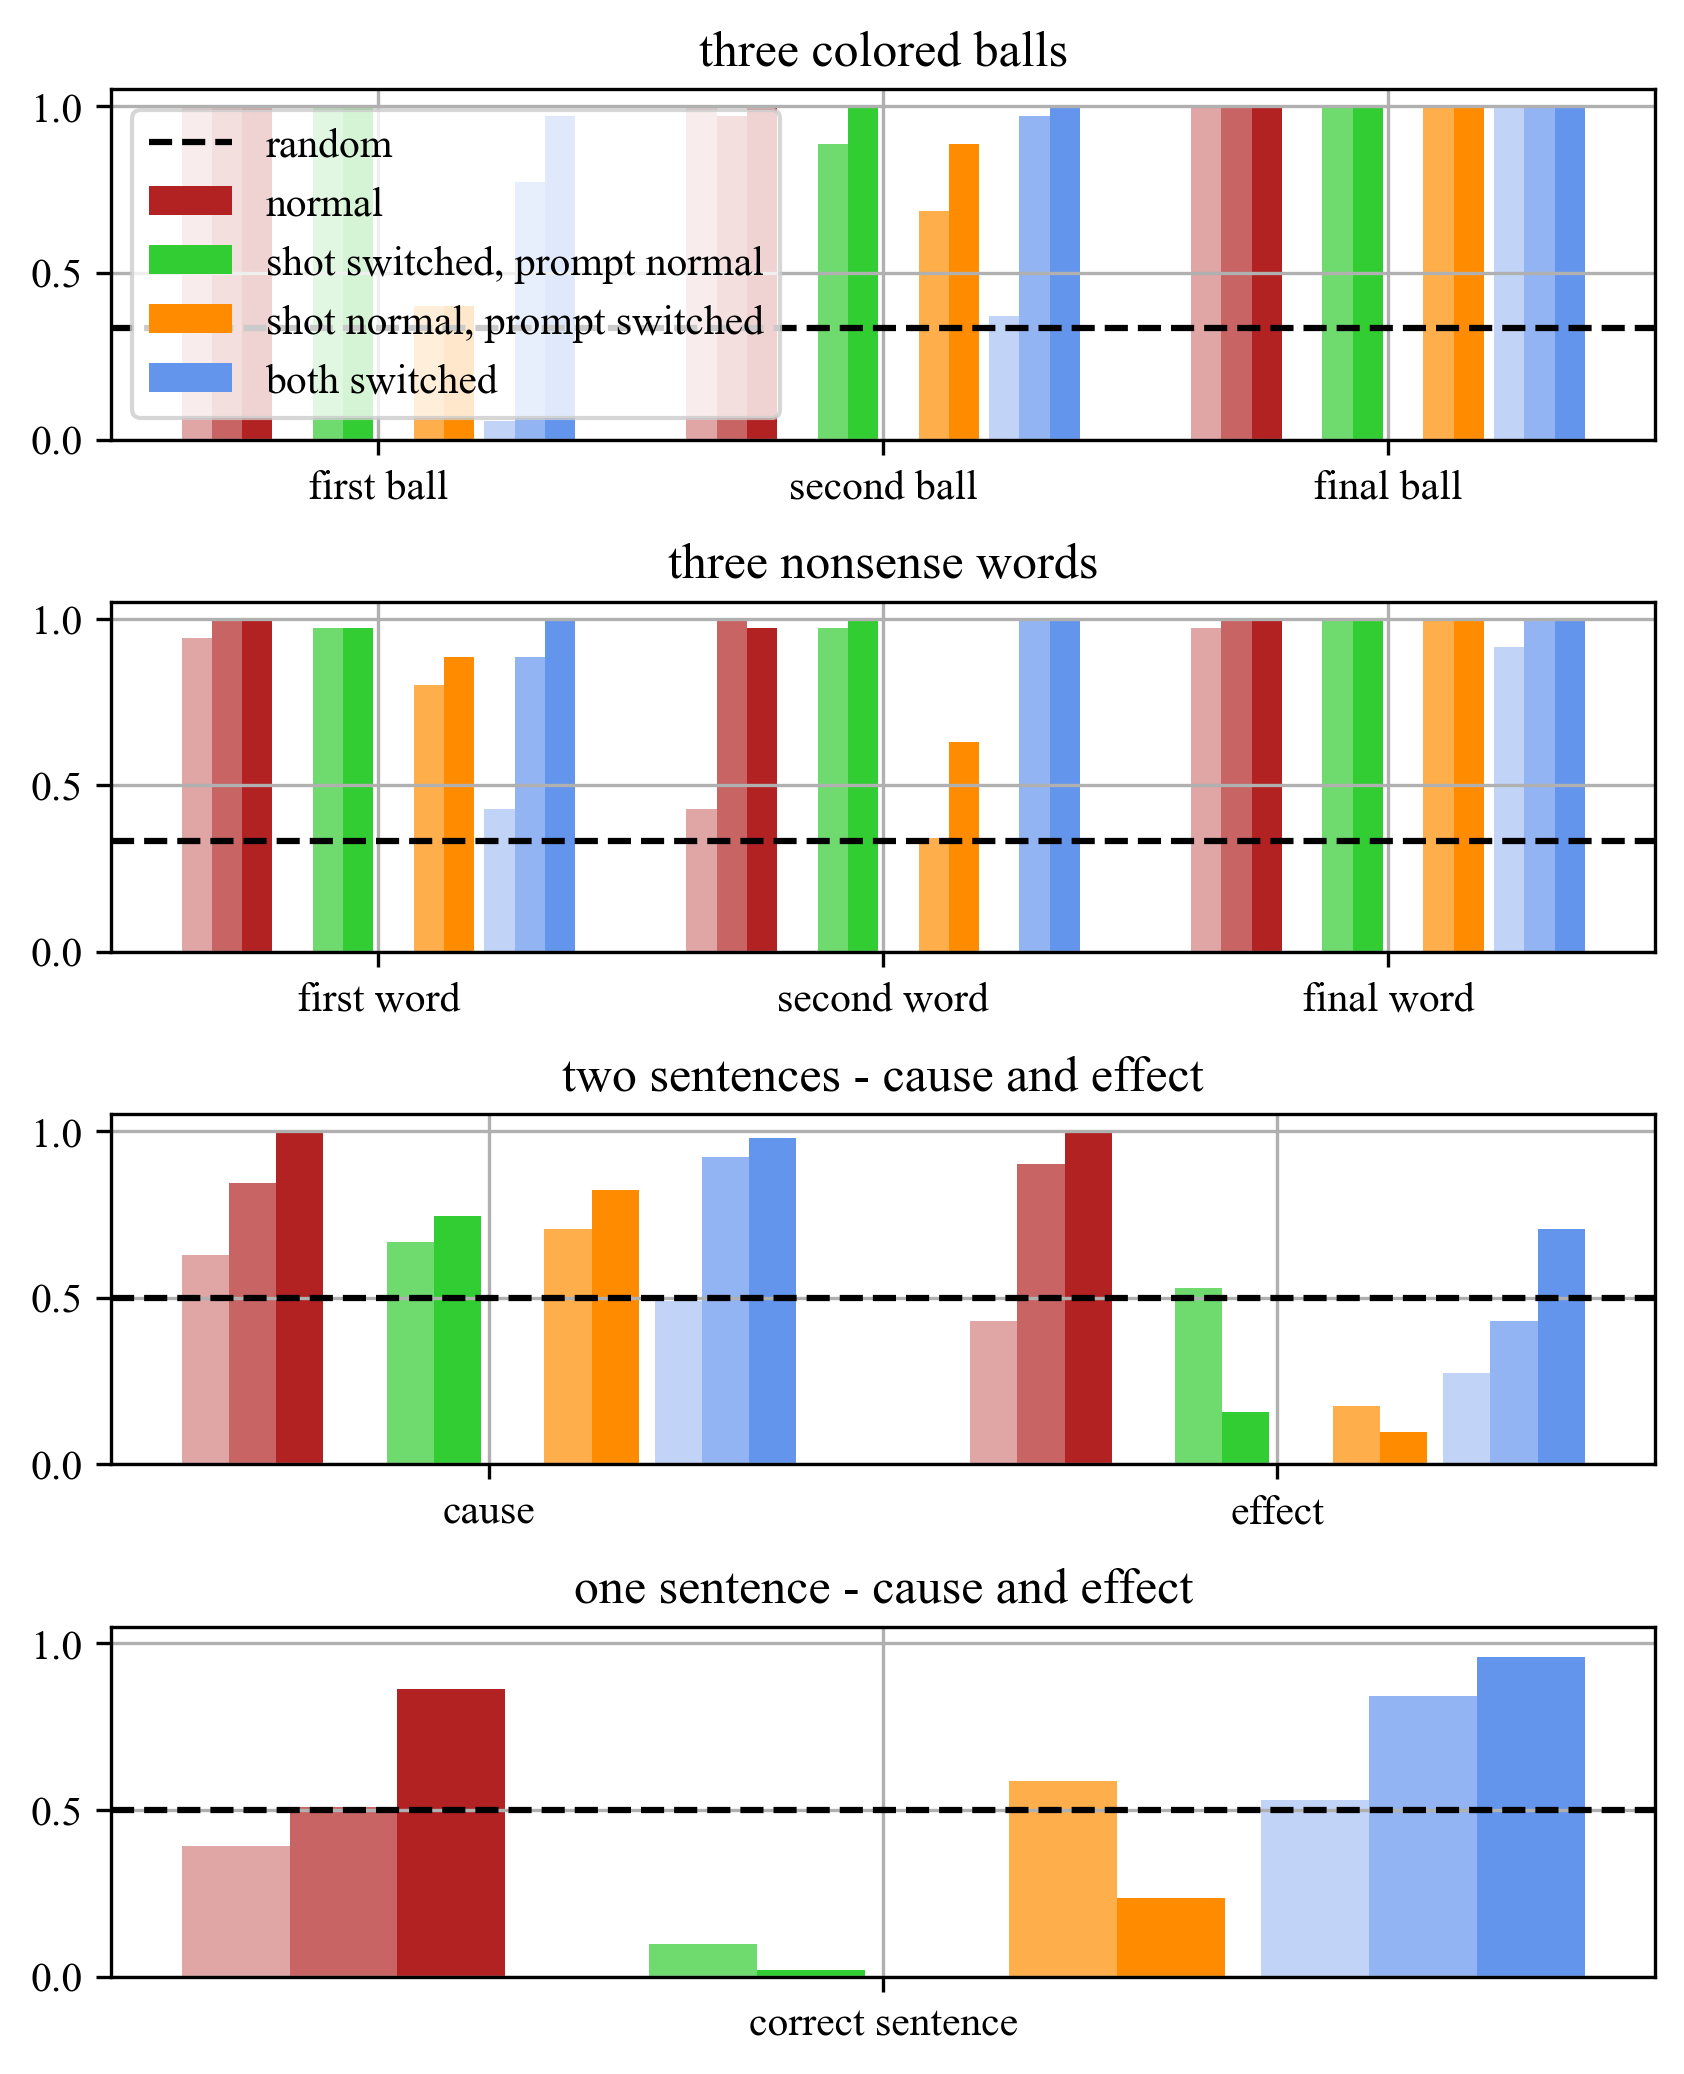

In [14]:
compare_switched_order_across_tasks_zero_one_k_shot_switched_shot(model_name="text-davinci-002", save_file="figures/switched_order_switched_shot_{}.pdf")

In [29]:
# Grid table as for previous result. This time plot for switched prompts & switched shots

def make_switched_size_vs_shots_grid_switched_shot(save_file):
      
    results_3c_os, lengths_3c_os = utils.compare_model_sizes_colors("data/toy_problem_3_colors_results/toy_problem_3c_one_shot_results_{}.csv", switched_shot=True)
    results_3n_os, lengths_3n_os = utils.compare_model_sizes_nonsense_words("data/toy_problem_3_nonsense_words_results/toy_problem_3n_one_shot_results_{}.csv", switched_shot=True)
    results_2s_os, lengths_2s_os = utils.compare_model_sizes_ce_2_sentences("data/bigbench_results/ce_two_sentences_one_shot_results_{}.csv", switched_shot=True)
    results_1s_os, lengths_1s_os = utils.compare_model_sizes_ce_1_sentence("data/bigbench_results/ce_one_sentence_one_shot_results_{}.csv", switched_shot=True)
    
    results_3c_ks, lengths_3c_ks = utils.compare_model_sizes_colors("data/toy_problem_3_colors_results/toy_problem_3c_k_shot_results_{}.csv", switched_shot=True)
    results_3n_ks, lengths_3n_ks = utils.compare_model_sizes_nonsense_words("data/toy_problem_3_nonsense_words_results/toy_problem_3n_k_shot_results_{}.csv", switched_shot=True)
    results_2s_ks, lengths_2s_ks = utils.compare_model_sizes_ce_2_sentences("data/bigbench_results/ce_two_sentences_k_shot_results_{}.csv", switched_shot=True)
    results_1s_ks, lengths_1s_ks = utils.compare_model_sizes_ce_1_sentence("data/bigbench_results/ce_one_sentence_k_shot_results_{}.csv", switched_shot=True)

    
    results_ada_os_ss, lengths_ada_os_ss = [], []
    results_ada_ks_ss, lengths_ada_ks_ss = [], []
    results_babbage_os_ss, lengths_babbage_os_ss = [], []
    results_babbage_ks_ss, lengths_babbage_ks_ss = [], []
    results_curie_os_ss, lengths_curie_os_ss = [], []
    results_curie_ks_ss, lengths_curie_ks_ss = [], []
    results_davinci_os_ss, lengths_davinci_os_ss = [], []
    results_davinci_ks_ss, lengths_davinci_ks_ss = [], []
    
    results_ada_os_switched_nss, lengths_ada_os_switched_nss = [], []
    results_ada_ks_switched_nss, lengths_ada_ks_switched_nss = [], []
    results_babbage_os_switched_nss, lengths_babbage_os_switched_nss = [], []
    results_babbage_ks_switched_nss, lengths_babbage_ks_switched_nss = [], []
    results_curie_os_switched_nss, lengths_curie_os_switched_nss = [], []
    results_curie_ks_switched_nss, lengths_curie_ks_switched_nss = [], []
    results_davinci_os_switched_nss, lengths_davinci_os_switched_nss = [], []
    results_davinci_ks_switched_nss, lengths_davinci_ks_switched_nss = [], []
    
    
    ## one shot
    for v in [results_3c_os, results_3n_os, results_2s_os, results_1s_os]:
        results_ada_os_ss.append(v[0][:,1].sum())
        results_babbage_os_ss.append(v[1][:,1].sum())
        results_curie_os_ss.append(v[2][:,1].sum())
        results_davinci_os_ss.append(v[3][:,1].sum())
        results_ada_os_switched_nss.append(v[0][:,2].sum())
        results_babbage_os_switched_nss.append(v[1][:,2].sum())
        results_curie_os_switched_nss.append(v[2][:,2].sum())
        results_davinci_os_switched_nss.append(v[3][:,2].sum())
        
    for v in [lengths_3c_os, lengths_3n_os, lengths_2s_os, lengths_1s_os]:
        lengths_ada_os_ss.append(v[0][:,1].sum())
        lengths_babbage_os_ss.append(v[1][:,1].sum())
        lengths_curie_os_ss.append(v[2][:,1].sum())
        lengths_davinci_os_ss.append(v[3][:,1].sum())   
        lengths_ada_os_switched_nss.append(v[0][:,2].sum())
        lengths_babbage_os_switched_nss.append(v[1][:,2].sum())
        lengths_curie_os_switched_nss.append(v[2][:,2].sum())
        lengths_davinci_os_switched_nss.append(v[3][:,2].sum())  
        
    ## k=5 shot
    for v in [results_3c_ks, results_3n_ks, results_2s_ks, results_1s_ks]:
        results_ada_ks_ss.append(v[0][:,1].sum())
        results_babbage_ks_ss.append(v[1][:,1].sum())
        results_curie_ks_ss.append(v[2][:,1].sum())
        results_davinci_ks_ss.append(v[3][:,1].sum())
        results_ada_ks_switched_nss.append(v[0][:,2].sum())
        results_babbage_ks_switched_nss.append(v[1][:,2].sum())
        results_curie_ks_switched_nss.append(v[2][:,2].sum())
        results_davinci_ks_switched_nss.append(v[3][:,2].sum())
        
    for v in [lengths_3c_ks, lengths_3n_ks, lengths_2s_ks, lengths_1s_ks]:
        lengths_ada_ks_ss.append(v[0][:,1].sum())
        lengths_babbage_ks_ss.append(v[1][:,1].sum())
        lengths_curie_ks_ss.append(v[2][:,1].sum())
        lengths_davinci_ks_ss.append(v[3][:,1].sum())  
        lengths_ada_ks_switched_nss.append(v[0][:,2].sum())
        lengths_babbage_ks_switched_nss.append(v[1][:,2].sum())
        lengths_curie_ks_switched_nss.append(v[2][:,2].sum())
        lengths_davinci_ks_switched_nss.append(v[3][:,2].sum()) 
        

    entry_ada_os_ss = np.sum(results_ada_os_ss)/np.sum(lengths_ada_os_ss)
    entry_babbage_os_ss = np.sum(results_babbage_os_ss)/np.sum(lengths_babbage_os_ss)
    entry_curie_os_ss = np.sum(results_curie_os_ss)/np.sum(lengths_curie_os_ss)
    entry_davinci_os_ss = np.sum(results_davinci_os_ss)/np.sum(lengths_davinci_os_ss)
    entry_ada_os_switched_nss = np.sum(results_ada_os_switched_nss)/np.sum(lengths_ada_os_switched_nss)
    entry_babbage_os_switched_nss = np.sum(results_babbage_os_switched_nss)/np.sum(lengths_babbage_os_switched_nss)
    entry_curie_os_switched_nss = np.sum(results_curie_os_switched_nss)/np.sum(lengths_curie_os_switched_nss)
    entry_davinci_os_switched_nss = np.sum(results_davinci_os_switched_nss)/np.sum(lengths_davinci_os_switched_nss)
    
    entry_ada_ks_ss = np.sum(results_ada_ks_ss)/np.sum(lengths_ada_ks_ss)
    entry_babbage_ks_ss = np.sum(results_babbage_ks_ss)/np.sum(lengths_babbage_ks_ss)
    entry_curie_ks_ss = np.sum(results_curie_ks_ss)/np.sum(lengths_curie_ks_ss)
    entry_davinci_ks_ss = np.sum(results_davinci_ks_ss)/np.sum(lengths_davinci_ks_ss)
    entry_ada_ks_switched_nss = np.sum(results_ada_ks_switched_nss)/np.sum(lengths_ada_ks_switched_nss)
    entry_babbage_ks_switched_nss = np.sum(results_babbage_ks_switched_nss)/np.sum(lengths_babbage_ks_switched_nss)
    entry_curie_ks_switched_nss = np.sum(results_curie_ks_switched_nss)/np.sum(lengths_curie_ks_switched_nss)
    entry_davinci_ks_switched_nss = np.sum(results_davinci_ks_switched_nss)/np.sum(lengths_davinci_ks_switched_nss)
    
    ##### make one big graph
    grid_values = np.array([[entry_ada_os_ss, entry_babbage_os_ss, entry_curie_os_ss, entry_davinci_os_ss],
                      [entry_ada_ks_ss, entry_babbage_ks_ss, entry_curie_ks_ss, entry_davinci_ks_ss]])
    
    grid_values_switched = np.array([[entry_ada_os_switched_nss, entry_babbage_os_switched_nss, entry_curie_os_switched_nss, entry_davinci_os_switched_nss],
                      [entry_ada_ks_switched_nss, entry_babbage_ks_switched_nss, entry_curie_ks_switched_nss, entry_davinci_ks_switched_nss]])
    
    fig, ax = plt.subplots(1, 2, figsize=(figwidth, 2*figheight), dpi=300, sharey=True)
    
    ax[0].imshow(grid_values, cmap='magma', vmin=0, vmax=1)
    ax[0].set_xticks(np.arange(4))
    ax[0].set_xticklabels(["ada", "babbage", "curie", "davinci"])
    ax[0].set_yticks(np.arange(2))
    ax[0].set_yticklabels(["one-shot", "k=5-shot"])
    ax[0].set_title("shot switched, prompt normal")
    
    ax[1].imshow(grid_values_switched, cmap='magma', vmin=0, vmax=1)
    ax[1].set_xticks(np.arange(4))
    ax[1].set_xticklabels(["ada", "babbage", "curie", "davinci"])
#    ax[1].set_yticks(np.arange(2))
#    ax[1].set_yticklabels(["one-shot", "k=5-shot"])
    ax[1].set_title("shot normal, prompt switched")
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    grid_values_rounded = np.around(grid_values, 2)
    grid_values_switched_rounded = np.around(grid_values_switched, 2)
    
    # Loop over data dimensions and create text annotations.
    for i in range(2):
        for j in range(4):
            text = ax[0].text(j, i, grid_values_rounded[i,j],
                           ha="center", va="center", color="cyan")
            text = ax[1].text(j, i, grid_values_switched_rounded[i,j],
                           ha="center", va="center", color="cyan")
    
    plt.tight_layout()
    plt.savefig(save_file)
    plt.show();

<ipython-input-29-fddeed970583>:136: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


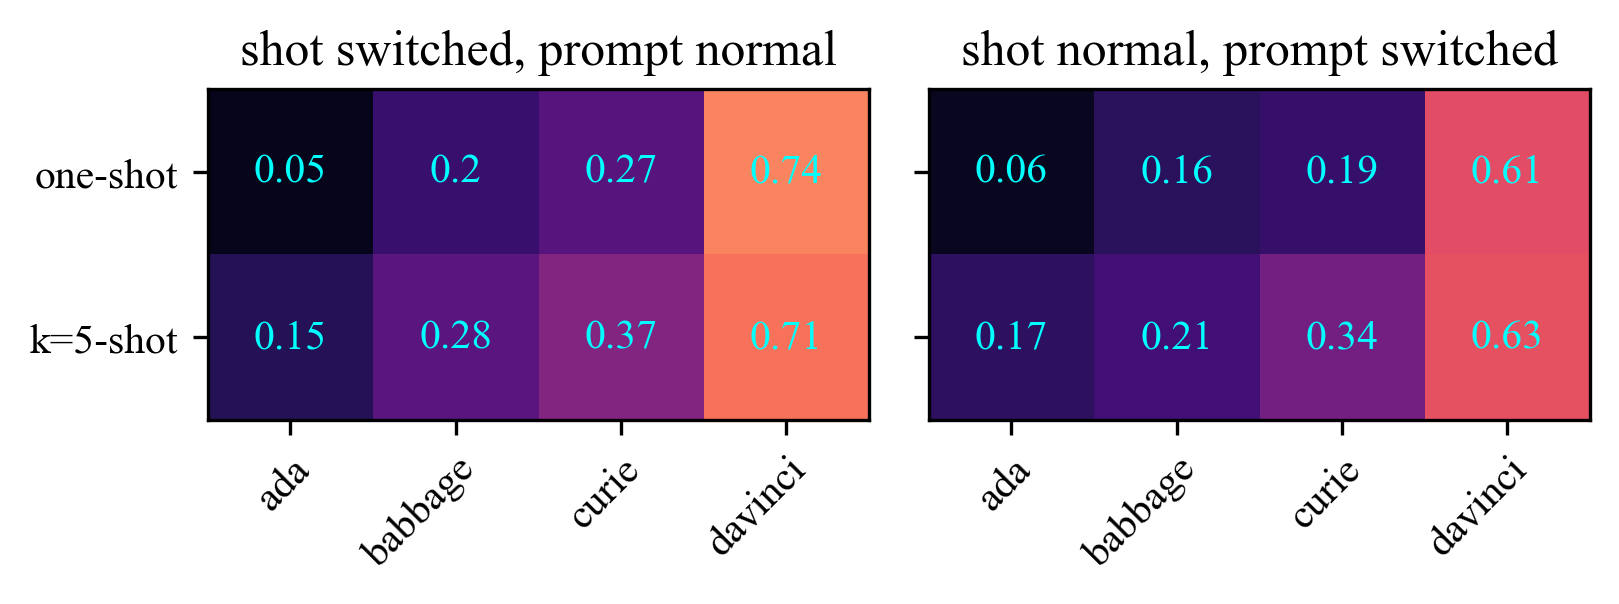

In [30]:
make_switched_size_vs_shots_grid_switched_shot(save_file="figures/size_vs_shots_switched_grid_switched_shot.pdf")

# What are the limits?

Does the model still give the right answers if we extend the chain of the toy examples to n=5? Using davinci-text-002 only. 

In [17]:
def plot_5colors_results(save_file="figures/toy_problem_5_colors.pdf"):
    
    fig, ax = plt.subplots(3, 1, figsize=(figwidth, 3*figheight), dpi=200, sharex=True)
    
    df_5c_zs = pd.read_csv("data/toy_problem_5_colors_results/toy_problem_5c_zero_shot_results_text-davinci-002.csv")
    df_5c_os = pd.read_csv("data/toy_problem_5_colors_results/toy_problem_5c_one_shot_results_text-davinci-002.csv")
    df_5c_ks = pd.read_csv("data/toy_problem_5_colors_results/toy_problem_5c_k_shot_results_text-davinci-002.csv")
    
    results_5c_zs, len_5c_zs = utils.eval_df_5colors(df_5c_zs, shuffled_shot=False)
    results_5c_os, len_5c_os = utils.eval_df_5colors(df_5c_os, shuffled_shot=False)
    results_5c_os_ss, len_5c_os_ss = utils.eval_df_5colors(df_5c_os, shuffled_shot=True)
    results_5c_ks, len_5c_ks = utils.eval_df_5colors(df_5c_ks, shuffled_shot=False)
    results_5c_ks_ss, len_5c_ks_ss = utils.eval_df_5colors(df_5c_ks, shuffled_shot=True)
    
    tick_labels_5c = ["first ball", "second ball", "third ball", "fourth ball", "final ball"]
    colors = ["firebrick", "limegreen", "darkorange", "cornflowerblue"]
    x5 = np.arange(5)
    c = 0.2
    w = 0.18
    
    # subfig 1: zero shot
    perc_5c_zs = results_5c_zs / len_5c_zs
    ax[0].bar(x5 - 1.5*c, perc_5c_zs[:,1], width=w, color=colors[0], label="normal prompt")
    #
    #
    ax[0].bar(x5 + 1.5*c, perc_5c_zs[:,2], width=w, color=colors[3], label="shuffled prompt")
    ax[0].grid()
    ax[0].axhline(1/5, linestyle='--', color='black', label="random")
    ax[0].set_ylim(0, 1.05)
    ax[0].set_title("zero shot")
    
    # subfig 2: one shot
    perc_5c_os = results_5c_os / len_5c_os
    perc_5c_os_ss = results_5c_os_ss / len_5c_os_ss
    ax[1].bar(x5 - 1.5*c, perc_5c_os[:,1], width=w, color=colors[0], label="normal shot, normal prompt") 
    ax[1].bar(x5 - 0.5*c, perc_5c_os_ss[:,1], width=w, color=colors[1], label="normal shot, shuffled prompt")
    ax[1].bar(x5 + 0.5*c, perc_5c_os_ss[:,2], width=w, color=colors[2], label="shuffled shot, normal prompt")
    ax[1].bar(x5 + 1.5*c, perc_5c_os[:,2], width=w, color=colors[3], label="shuffled shot, shuffled prompt")  
    ax[1].legend()
    ax[1].grid()
    ax[1].axhline(1/5, linestyle='--', color='black', label="random")
    ax[1].set_ylim(0, 1.05)
    ax[1].set_title("one shot")

    # subfig 3: k=5 shot
    perc_5c_ks = results_5c_ks / len_5c_ks
    perc_5c_ks_ss = results_5c_ks_ss / len_5c_ks_ss
    ax[2].bar(x5 - 1.5*c, perc_5c_ks[:,1], width=w, color=colors[0], label="normal shot, normal prompt") 
    ax[2].bar(x5 - 0.5*c, perc_5c_ks_ss[:,1], width=w, color=colors[1], label="normal shot, shuffled prompt")
    ax[2].bar(x5 + 0.5*c, perc_5c_ks_ss[:,2], width=w, color=colors[2], label="shuffled shot, normal prompt")
    ax[2].bar(x5 + 1.5*c, perc_5c_ks[:,2], width=w, color=colors[3], label="shuffled shot, shuffled prompt")
    ax[2].grid()
    ax[2].axhline(1/5, linestyle='--', color='black', label="random")
    ax[2].set_ylim(0, 1.05)
    ax[2].set_title("k=5 shot")
    
    ax[2].set_xticks(x5)
    ax[2].set_xticklabels(tick_labels_5c, rotation=0)
    
    plt.suptitle("Toy setup with 5 colored balls")
    plt.savefig(save_file)
    plt.show();

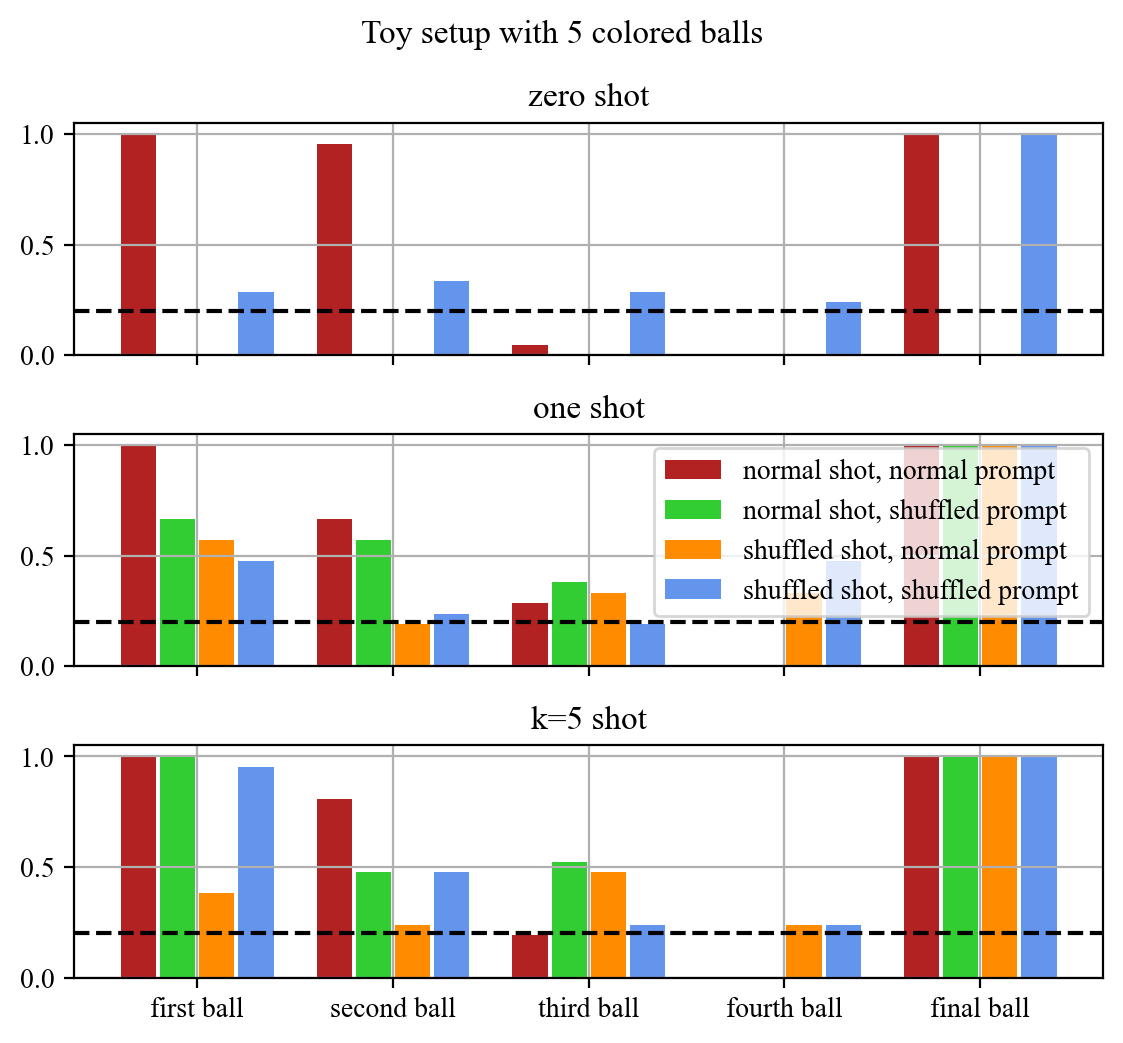

In [18]:
plot_5colors_results(save_file="figures/toy_problem_5_colors.pdf")

# Main findings figure

Our main finding is that GPT-3 doesn't really perform well for our toy settings; using best model only

I.e. it focuses more on form than on content, or it doesn't get it at all. 

In [33]:
# Grid table as for previous result. This time add a second plot for switched prompts

def make_comparison_davinci_grid(save_file):
    
    results_3c_zs, lengths_3c_zs = utils.compare_model_sizes_colors("data/toy_problem_3_colors_results/toy_problem_3c_zero_shot_results_{}.csv")
    results_3n_zs, lengths_3n_zs = utils.compare_model_sizes_nonsense_words("data/toy_problem_3_nonsense_words_results/toy_problem_3n_zero_shot_results_{}.csv")
    results_2s_zs, lengths_2s_zs = utils.compare_model_sizes_ce_2_sentences("data/bigbench_results/ce_two_sentences_zero_shot_results_{}.csv")
    results_1s_zs, lengths_1s_zs = utils.compare_model_sizes_ce_1_sentence("data/bigbench_results/ce_one_sentence_zero_shot_results_{}.csv")
    
    results_3c_os, lengths_3c_os = utils.compare_model_sizes_colors("data/toy_problem_3_colors_results/toy_problem_3c_one_shot_results_{}.csv")
    results_3n_os, lengths_3n_os = utils.compare_model_sizes_nonsense_words("data/toy_problem_3_nonsense_words_results/toy_problem_3n_one_shot_results_{}.csv")
    results_2s_os, lengths_2s_os = utils.compare_model_sizes_ce_2_sentences("data/bigbench_results/ce_two_sentences_one_shot_results_{}.csv")
    results_1s_os, lengths_1s_os = utils.compare_model_sizes_ce_1_sentence("data/bigbench_results/ce_one_sentence_one_shot_results_{}.csv")
    
    results_3c_ks, lengths_3c_ks = utils.compare_model_sizes_colors("data/toy_problem_3_colors_results/toy_problem_3c_k_shot_results_{}.csv")
    results_3n_ks, lengths_3n_ks = utils.compare_model_sizes_nonsense_words("data/toy_problem_3_nonsense_words_results/toy_problem_3n_k_shot_results_{}.csv")
    results_2s_ks, lengths_2s_ks = utils.compare_model_sizes_ce_2_sentences("data/bigbench_results/ce_two_sentences_k_shot_results_{}.csv")
    results_1s_ks, lengths_1s_ks = utils.compare_model_sizes_ce_1_sentence("data/bigbench_results/ce_one_sentence_k_shot_results_{}.csv")

    results_3c_os_ss, lengths_3c_os_ss = utils.compare_model_sizes_colors("data/toy_problem_3_colors_results/toy_problem_3c_one_shot_results_{}.csv", switched_shot=True)
    results_3n_os_ss, lengths_3n_os_ss = utils.compare_model_sizes_nonsense_words("data/toy_problem_3_nonsense_words_results/toy_problem_3n_one_shot_results_{}.csv", switched_shot=True)
    results_2s_os_ss, lengths_2s_os_ss = utils.compare_model_sizes_ce_2_sentences("data/bigbench_results/ce_two_sentences_one_shot_results_{}.csv", switched_shot=True)
    results_1s_os_ss, lengths_1s_os_ss = utils.compare_model_sizes_ce_1_sentence("data/bigbench_results/ce_one_sentence_one_shot_results_{}.csv", switched_shot=True)
    
    results_3c_ks_ss, lengths_3c_ks_ss = utils.compare_model_sizes_colors("data/toy_problem_3_colors_results/toy_problem_3c_k_shot_results_{}.csv", switched_shot=True)
    results_3n_ks_ss, lengths_3n_ks_ss = utils.compare_model_sizes_nonsense_words("data/toy_problem_3_nonsense_words_results/toy_problem_3n_k_shot_results_{}.csv", switched_shot=True)
    results_2s_ks_ss, lengths_2s_ks_ss = utils.compare_model_sizes_ce_2_sentences("data/bigbench_results/ce_two_sentences_k_shot_results_{}.csv", switched_shot=True)
    results_1s_ks_ss, lengths_1s_ks_ss = utils.compare_model_sizes_ce_1_sentence("data/bigbench_results/ce_one_sentence_k_shot_results_{}.csv", switched_shot=True)

    ### MIXED CONDITIONS results
    results_davinci_os_ss, lengths_davinci_os_ss = [], []
    results_davinci_ks_ss, lengths_davinci_ks_ss = [], []
    
    results_davinci_os_switched_nss, lengths_davinci_os_switched_nss = [], []
    results_davinci_ks_switched_nss, lengths_davinci_ks_switched_nss = [], []
    
    
    ## one shot
    for v in [results_3c_os_ss, results_3n_os_ss, results_2s_os_ss, results_1s_os_ss]:
        results_davinci_os_ss.append(v[3][:,1].sum())
        results_davinci_os_switched_nss.append(v[3][:,2].sum())
        
    for v in [lengths_3c_os_ss, lengths_3n_os_ss, lengths_2s_os_ss, lengths_1s_os_ss]:
        lengths_davinci_os_ss.append(v[3][:,1].sum())   
        lengths_davinci_os_switched_nss.append(v[3][:,2].sum())  
        
    ## k=5 shot
    for v in [results_3c_ks_ss, results_3n_ks_ss, results_2s_ks_ss, results_1s_ks_ss]:
        results_davinci_ks_ss.append(v[3][:,1].sum())
        results_davinci_ks_switched_nss.append(v[3][:,2].sum())
        
    for v in [lengths_3c_ks_ss, lengths_3n_ks_ss, lengths_2s_ks_ss, lengths_1s_ks_ss]:
        lengths_davinci_ks_ss.append(v[3][:,1].sum())  
        lengths_davinci_ks_switched_nss.append(v[3][:,2].sum()) 
        
    entry_davinci_os_ss = np.sum(results_davinci_os_ss)/np.sum(lengths_davinci_os_ss)
    entry_davinci_os_switched_nss = np.sum(results_davinci_os_switched_nss)/np.sum(lengths_davinci_os_switched_nss)
    
    entry_davinci_ks_ss = np.sum(results_davinci_ks_ss)/np.sum(lengths_davinci_ks_ss)
    entry_davinci_ks_switched_nss = np.sum(results_davinci_ks_switched_nss)/np.sum(lengths_davinci_ks_switched_nss)
    
    ### BOTH CONDITIONS SIMILAR RESULTS
    results_davinci_zs, lengths_davinci_zs = [], []
    results_davinci_os, lengths_davinci_os = [], []
    results_davinci_ks, lengths_davinci_ks = [], []
    
    results_davinci_zs_switched, lengths_davinci_zs_switched = [], []
    results_davinci_os_switched, lengths_davinci_os_switched = [], []
    results_davinci_ks_switched, lengths_davinci_ks_switched = [], []
    
    ## zero shot
    for v in [results_3c_zs, results_3n_zs, results_2s_zs, results_1s_zs]:
        results_davinci_zs.append(v[3][:,1].sum())
        results_davinci_zs_switched.append(v[3][:,2].sum())
        
    for v in [lengths_3c_zs, lengths_3n_zs, lengths_2s_zs, lengths_1s_zs]:
        lengths_davinci_zs.append(v[3][:,1].sum())
        lengths_davinci_zs_switched.append(v[3][:,2].sum())
        
    ## one shot
    for v in [results_3c_os, results_3n_os, results_2s_os, results_1s_os]:
        results_davinci_os.append(v[3][:,1].sum())
        results_davinci_os_switched.append(v[3][:,2].sum())
        
    for v in [lengths_3c_os, lengths_3n_os, lengths_2s_os, lengths_1s_os]:
        lengths_davinci_os.append(v[3][:,1].sum())   
        lengths_davinci_os_switched.append(v[3][:,2].sum())  
        
    ## k=5 shot
    for v in [results_3c_ks, results_3n_ks, results_2s_ks, results_1s_ks]:
        results_davinci_ks.append(v[3][:,1].sum())
        results_davinci_ks_switched.append(v[3][:,2].sum())
        
    for v in [lengths_3c_ks, lengths_3n_ks, lengths_2s_ks, lengths_1s_ks]:
        lengths_davinci_ks.append(v[3][:,1].sum())  
        lengths_davinci_ks_switched.append(v[3][:,2].sum()) 
        
    entry_davinci_zs = np.sum(results_davinci_zs)/np.sum(lengths_davinci_zs)
    entry_davinci_zs_switched = np.sum(results_davinci_zs_switched)/np.sum(lengths_davinci_zs_switched)
    
    entry_davinci_os = np.sum(results_davinci_os)/np.sum(lengths_davinci_os)
    entry_davinci_os_switched = np.sum(results_davinci_os_switched)/np.sum(lengths_davinci_os_switched)
    
    entry_davinci_ks = np.sum(results_davinci_ks)/np.sum(lengths_davinci_ks)
    entry_davinci_ks_switched = np.sum(results_davinci_ks_switched)/np.sum(lengths_davinci_ks_switched)
    
    ##### make one big graph
    grid_values = np.array([[entry_davinci_zs, -1, -1, entry_davinci_zs_switched],
                      [entry_davinci_os, entry_davinci_os_ss, entry_davinci_os_switched_nss, entry_davinci_os_switched],
                      [entry_davinci_ks, entry_davinci_ks_ss, entry_davinci_ks_switched_nss, entry_davinci_ks_switched]])
    
    
    fig, ax = plt.subplots(1, 1, figsize=(1.2*figwidth, 1.2*figheight), dpi=300)
    
    ax.imshow(grid_values, cmap='magma', vmin=0, vmax=1)
    ax.set_xticks(np.arange(4))
    ax.set_xticklabels(["shot normal, prompt normal", "shot switched, prompt normal",
                        "shot normal, prompt switched", "shot switched, prompt switched"], rotation=90)
    ax.set_yticks(np.arange(3))
    ax.set_yticklabels(["zero-shot", "one-shot", "k=5-shot"])
    ax.set_title("Combinations of orders in shot and prompts", size=8)
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=60, ha="right",
             rotation_mode="anchor", fontsize=4)
    
    grid_values_rounded = np.around(grid_values, 2)
    
    # Loop over data dimensions and create text annotations.
    for i in range(3):
        for j in range(4):
            text = ax.text(j, i, grid_values_rounded[i,j],
                           ha="center", va="center", color="cyan")
    
    #plt.tight_layout()
    plt.savefig(save_file)
    plt.show();

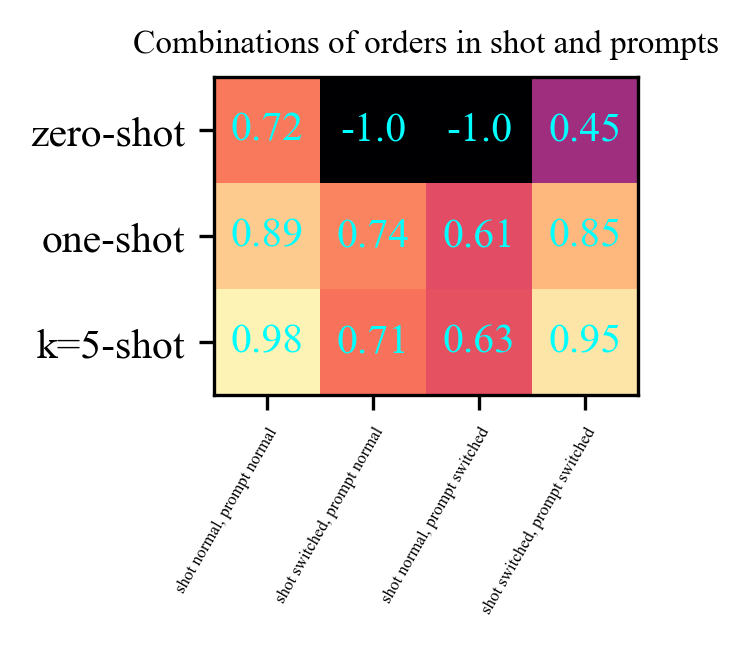

In [34]:
make_comparison_davinci_grid(save_file="figures/comparison_grid.pdf")